## Housing in America: predictive time series models
### Project Proposal by Hannah Halvorsen
### CSCI E-116 Dynamic Modeling and Forecasting in Big Data (Professor William Yu)
### Harvard Extension School
### Spring 2024


### Problem Statement: Predictive Modeling for Housing Price Index (HPI) in the United States

The housing market in the United States is a crucial economic indicator with far-reaching implications for policymakers, investors, lenders, and individuals alike. The ability to accurately forecast the Housing Price Index (HPI) holds immense value in understanding market dynamics, making informed decisions, and implementing effective interventions. In this project, we aim to develop predictive time series models that leverage historical HPI data along with other relevant economic variables to forecast future HPI trends.

### Value of the Project:

This project offers significant value to various stakeholders:

Policymakers: Informed policymaking related to housing policy, economic stability, and community development initiatives.

Researchers: Insights into housing market dynamics for academic research and analysis.

Lenders: Better risk assessment and investment strategies based on predicted HPI trends.

Individuals: Understanding housing market trends for informed decision-making on buying, selling, or investing in properties.

### Results Sought:

The goal is to develop a predictive model capable of accurately forecasting HPI fluctuations. By employing historical HPI data and other pertinent economic variables, we aim to achieve robust predictions that enable stakeholders to anticipate market movements and plan accordingly.


# Summary of key points about the data 
Here's a summary of key points:

Data Source: The FHFA House Price Index (HPI) is based on data from conventional conforming mortgage transactions obtained from Freddie Mac and Fannie Mae.

Methodology: The index is calculated using a modified version of the weighted-repeat sales (WRS) methodology proposed by Case and Shiller (1989). This method involves repeated observations of housing values for individual single-family residential properties.

Base Period: The index is based on repeated observations of housing values for properties on which at least two mortgages were originated and purchased by Freddie Mac or Fannie Mae since January 1975.

Constant Quality Index: The index is described as a "constant quality" house price index because it controls for differences in the quality of the houses comprising the sample used for statistical estimation.

Geographic Coverage: The HPI is reported for the nation, U.S. Census divisions, and states. It includes single-family detached properties financed by conforming conventional mortgages purchased by Freddie Mac or Fannie Mae.

Update Frequency: The HPI is updated quarterly as additional mortgages are purchased by Freddie Mac and Fannie Mae.

Statistical Methods: The index is estimated using a repeat sales method, which accounts for differences in the composition of the sample used for estimation. The method involves multivariate regression to control for properties that do not transact in every period.

# I will utilize the Fred library to import series that can be explored to look for relationships and predictive power of HPI


# Define the list of FRED series IDs
series_ids:
   
   'UNRATE',        # Unemployment Rate
   
   'CPIAUCSL',      # Consumer Price Index for All Urban Consumers: All Items
   
   'PCE',           # Personal Consumption Expenditures: Services
   
   'MORTGAGE30US',  # Mortgage Rates: 30-Year Fixed Rate
   
   'PERMIT',        # Building Permits
   
   'GDP',           # Gross Domestic Product
   
   'MSPUS',         # Median Sales Price of Houses Sold
   
   'DSPIC96',       # Real Disposable Personal Income
   
   'RHORUSQ156N',   # Homeownership Rate
   
   'GS10',          # 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
   
   'HSN1F',         # New Privately-Owned Housing Units Authorized by Building Permits
   
   'HOUST',         # Housing Starts: Total New Privately Owned Housing Units Started
   
   'WPSID62',       # Number of Households: Owner Occupied Housing Units: Median Value
   
   'PPICPE',        # Producer Price Index by Commodity: All Commodities
   
   'CSCICP03USM665S',  # Consumer Sentiment Index
   
   'POP',           # Population
   
   'CP',            # Construction Payroll Employment
   
   'CUMFNS',        # Capacity Utilization: Manufacturing


In [59]:
import pandas as pd 

In [60]:
data = pd.read_csv("/Users/hannah/Downloads/HPI_master.csv")
data

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.89,100.95
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.30,100.91
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.69,100.98
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.31,101.35
...,...,...,...,...,...,...,...,...,...,...
124809,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2022,4,191.03,193.57
124810,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,1,190.87,193.47
124811,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,2,212.11,208.13
124812,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,3,182.05,182.44


In [61]:
dictionary = pd.read_excel("/Users/hannah/Downloads/HPI_dictionary.xls")
dictionary

,title,FHFA House Price Index (HPI)
0,identifier,fhfa_hpi
1,description,The FHFA House Price Index (HPI) is a broad me...
2,number of variables,12
3,number of observations,"over 90,000"
4,data coverage dates,1991 until present (most recent quarter or month)
5,URL to CSV,http://www.fhfa.gov/HPI_master.csv
6,URL to JSON,http://www.fhfa.gov/HPI_master.json
7,URL to XML,http://www.fhfa.gov/HPI_master.xml
8,URL to SQL,http://www.fhfa.gov/HPI_master.sql
9,URL to technical information,http://www.fhfa.gov/PolicyProgramsResearch/Res...


### Understanding the Columns:

hpi_type: Indicates the type of HPI, whether it's traditional or developmental.

hpi_flavor: Specifies the flavor of the HPI, such as purchase-only.

frequency: Denotes the frequency of the data, whether it's monthly or quarterly.

level: Represents the geographical level of the data, such as USA, Census Division, or specific states like Puerto Rico.

place_name: Provides the name of the geographical area.

place_id: Gives a unique identifier for the geographical area.

yr: Stands for the year of the data.

period: Represents the period within the year, such as month or quarter.

index_nsa: Indicates the index value without seasonal adjustment.

index_sa: Indicates the index value with seasonal adjustment.

Interpreting the Data:

The dataset contains multiple rows, each representing a specific observation of the HPI.

Each observation includes details about the type, flavor, frequency, geographical level, place name, year, period, and index values of the HPI.

The index values represent the average price changes in repeat sales or refinancings on single-family properties.

# Step One:  understanding the structure of the dataset and interpreting the information provided in each column

Analyzing Trends:

You can analyze trends in house prices over time by examining how the index values change across different years and periods.
You can also compare index values between different geographical areas to identify regional variations in house price movements.

Data Exploration:

Explore the dataset using descriptive statistics and visualizations to gain insights into house price trends and variations across different dimensions such as geographical regions, time periods, and types of HPI.
Overall, by understanding the structure of the dataset and interpreting the information provided in each column, you can analyze trends and patterns in house prices using the FHFA House Price Index data.

# Analyzing Trends:

### analyze trends in house prices over time by examining how the index values change across different years and periods

### Create a function that can accurately project the average HPI given the time, location, and mortgage type

In [62]:
import pandas as pd

def project_average_hpi(year, period, location, mortgage_type):
    filtered_data = data[(data['yr'] == year) & 
                         (data['period'] == period) & 
                         (data['place_name'] == location) & 
                         (data['hpi_type'] == mortgage_type)]
    
    # Calculate the average HPI
    average_hpi_nsa = filtered_data['index_nsa'].mean()
    average_hpi_sa = filtered_data['index_sa'].mean()
    
    return average_hpi_nsa, average_hpi_sa

# Example usage
year = 1991
period = 1
location = 'East North Central Division'
mortgage_type = 'traditional'
average_hpi_nsa, average_hpi_sa = project_average_hpi(year, period, location, mortgage_type)
print("Average HPI (Index NSA):", average_hpi_nsa)
print("Average HPI (Index SA):", average_hpi_sa)


Average HPI (Index NSA): 113.4975
Average HPI (Index SA): 100.0


In [63]:
# pip install geopandas


# Group the data by place_name and calculate the mean index NSA

In [64]:
# Filter the data for the year 2023
data_2023 = data[data['yr'] == 2023]

# Group the data by place_name and calculate the mean index NSA
mean_nsa_by_place = data_2023.groupby('place_name')['index_nsa'].mean()

# Print the mean index NSA for each place_name
print("Mean Index NSA for Each Place Name in 2023:")
print(mean_nsa_by_place)

Mean Index NSA for Each Place Name in 2023:
place_name
Abilene, TX                          329.792500
Akron, OH                            262.393750
Alabama                              348.399375
Alaska                               362.063750
Albany, GA                           224.555000
                                        ...    
Yakima, WA                           328.332500
York-Hanover, PA                     263.972500
Youngstown-Warren-Boardman, OH-PA    241.852500
Yuba City, CA                        365.320000
Yuma, AZ                             318.680000
Name: index_nsa, Length: 466, dtype: float64


# Plot the mean non seasonally adjusted HPI by place 

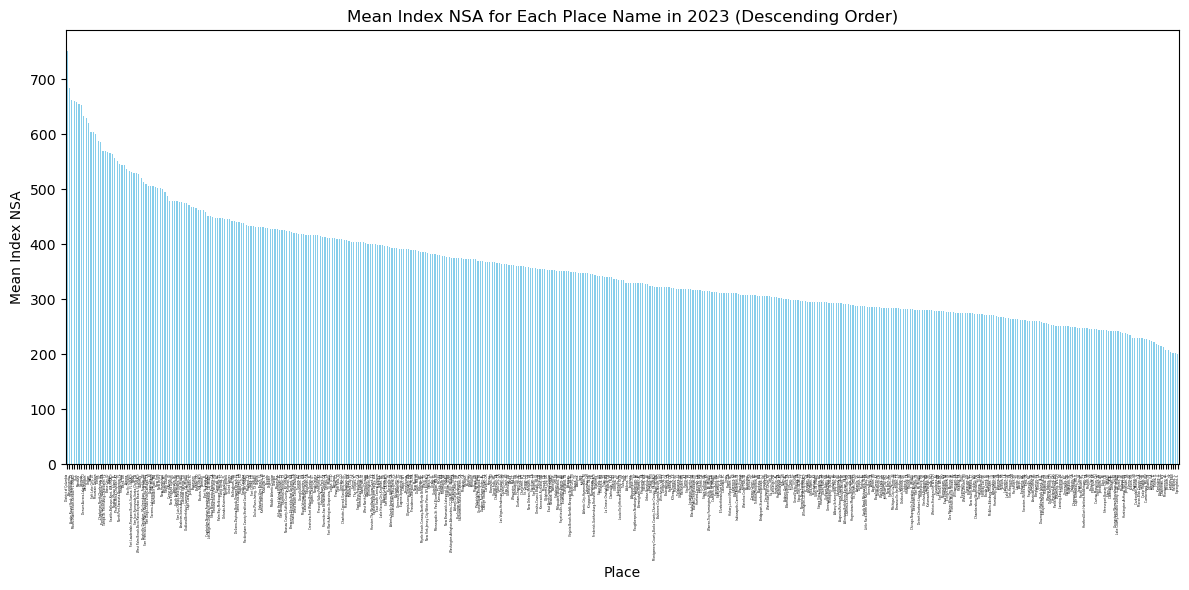

In [68]:
import matplotlib.pyplot as plt

# Sort the mean_nsa_by_place Series in descending order
mean_nsa_by_place_sorted = mean_nsa_by_place.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
mean_nsa_by_place_sorted.plot(kind='bar', color='skyblue')
plt.title('Mean Index NSA for Each Place Name in 2023 (Descending Order)')
plt.xlabel('Place')
plt.ylabel('Mean Index NSA')
#plt.xticks([])  # Remove tick marks on x-axis
plt.xticks(fontsize=2)
plt.tight_layout()
plt.show()


## Observations
Its too many places to look at all of their names, but this plot helps me visualize the distribution of the data. From this I can see there is a steep spike for the places that have an Non Seasonally Adjusted index between 400 and 600 and a gradual decline for most places between 400 and 250. Nothing below 200. This gives me a range of the mean and shows me where most of the HPI is. 

## Plot the Mean index NSa for the Bottom 10 and Top 10 Places by name in 2023

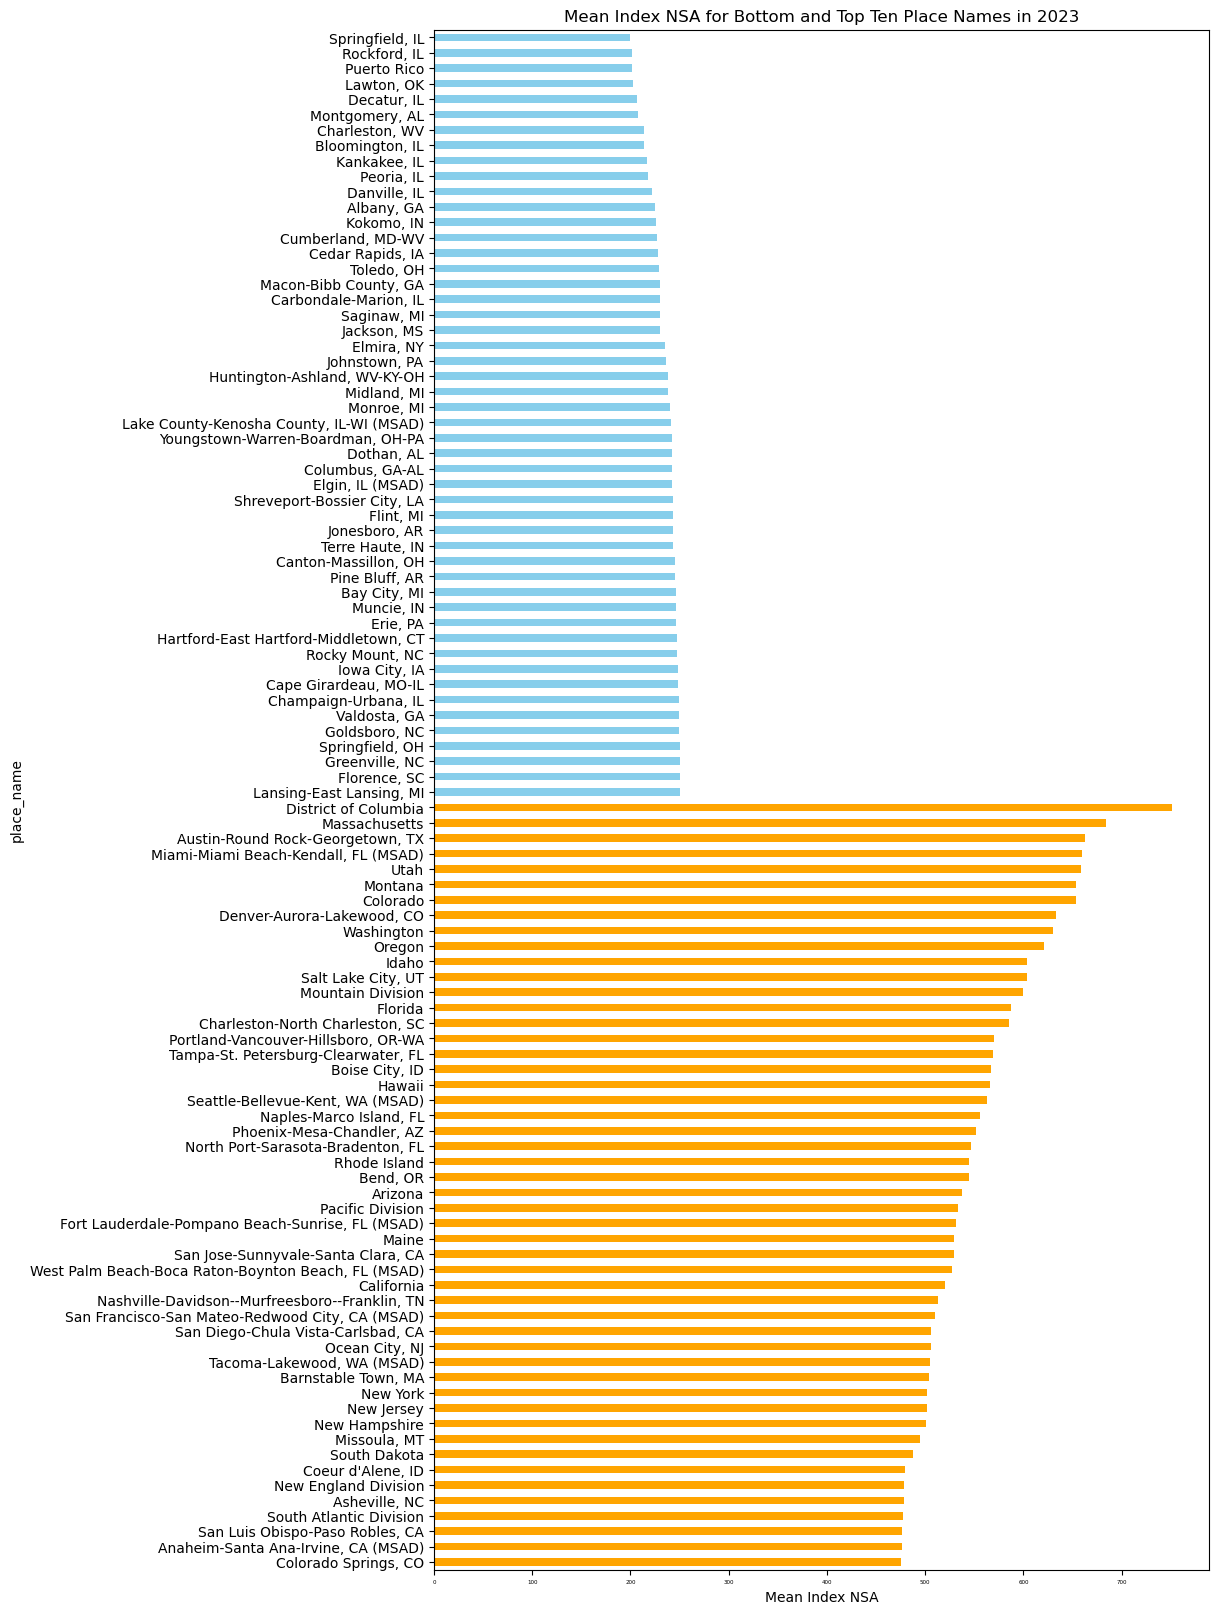

In [72]:
import matplotlib.pyplot as plt

# Sort the mean index NSA values in ascending order to get the bottom ten
bottom_ten = mean_nsa_by_place.sort_values().head(50)

# Sort the mean index NSA values in descending order to get the top ten
top_ten = mean_nsa_by_place.sort_values(ascending=False).head(50)

# Concatenate the bottom ten and top ten to plot
combined = pd.concat([bottom_ten, top_ten])

# Plotting
plt.figure(figsize=(10, 20))
combined.plot(kind='barh', color=['skyblue' if x in bottom_ten.index else 'orange' for x in combined.index])
plt.xlabel('Mean Index NSA')
plt.xticks(fontsize=4)
plt.title('Mean Index NSA for Bottom and Top Ten Place Names in 2023')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()


# Observations
This plot shows me the full range by place in the HPI. The top ten places are above 600 and the bottom ten are around 200. The last plot shows me the distribution of everything in between, but this helps me to see the extreme ends of HPI by place. 

In [13]:
# Calculate the number of unique values under the place_name column
num_unique_places = data['place_name'].nunique()

# Print the result
print("Number of different values under the place_name column:", num_unique_places)


Number of different values under the place_name column: 466


# Now calculate and plot the mean index by states and divisions. 

In [2]:
''''

# Extract the state from the place_name column
data['state'] = data['place_name'].apply(lambda x: x.split(",")[-1].strip())

# Group the data by state and calculate the mean index NSA
mean_nsa_by_state = data.groupby('state')['index_nsa'].mean()

# Print the mean index NSA for each state
print("Mean Index NSA for Each State:")
print(mean_nsa_by_state)

# Sort the mean_nsa_by_place Series in descending order
mean_nsa_by_state_sorted = mean_nsa_by_state.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
mean_nsa_by_state_sorted.plot(kind='bar', color='skyblue')
plt.title('Mean Index NSA for Each state in 2023 (Descending Order)')
plt.xlabel('Place Name')
plt.ylabel('Mean Index NSA')
#plt.xticks([])  # Remove tick marks on x-axis
plt.tight_layout()
plt.show()
'''


'\'\n\n# Extract the state from the place_name column\ndata[\'state\'] = data[\'place_name\'].apply(lambda x: x.split(",")[-1].strip())\n\n# Group the data by state and calculate the mean index NSA\nmean_nsa_by_state = data.groupby(\'state\')[\'index_nsa\'].mean()\n\n# Print the mean index NSA for each state\nprint("Mean Index NSA for Each State:")\nprint(mean_nsa_by_state)\n\n# Sort the mean_nsa_by_place Series in descending order\nmean_nsa_by_state_sorted = mean_nsa_by_state.sort_values(ascending=False)\n\n# Create a bar plot\nplt.figure(figsize=(12, 6))\nmean_nsa_by_state_sorted.plot(kind=\'bar\', color=\'skyblue\')\nplt.title(\'Mean Index NSA for Each state in 2023 (Descending Order)\')\nplt.xlabel(\'Place Name\')\nplt.ylabel(\'Mean Index NSA\')\n#plt.xticks([])  # Remove tick marks on x-axis\nplt.tight_layout()\nplt.show()\n'

# Plot the trend of the NSA index over time with different lines for each hpi_type

/var/folders/fn/y37l7tw52bs7r94fz3jsnwc40000gq/T/ipykernel_2941/3085569116.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='date', y='index_nsa', hue='hpi_type', ci=None)


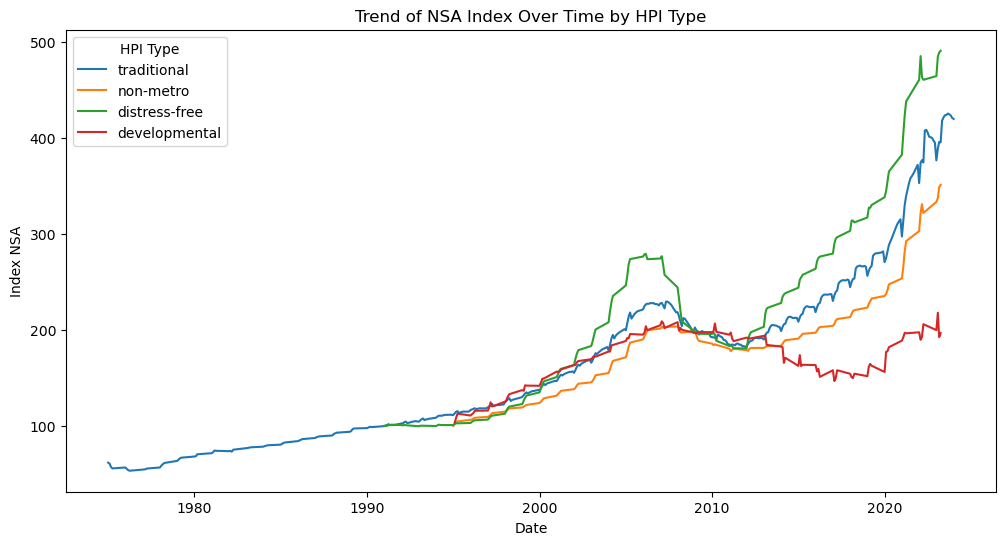

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'yr' and 'period' to datetime
data['date'] = pd.to_datetime(data['yr'].astype(str) + '-' + data['period'].astype(str))

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='index_nsa', hue='hpi_type', ci=None)
plt.title('Trend of NSA Index Over Time by HPI Type')
plt.xlabel('Date')
plt.ylabel('Index NSA')
plt.legend(title='HPI Type')
plt.show()


# Plot the trend of the SA index over time with different lines for each hpi_type

/var/folders/fn/y37l7tw52bs7r94fz3jsnwc40000gq/T/ipykernel_2941/2892734880.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='date', y='index_sa', hue='hpi_type', ci=None)


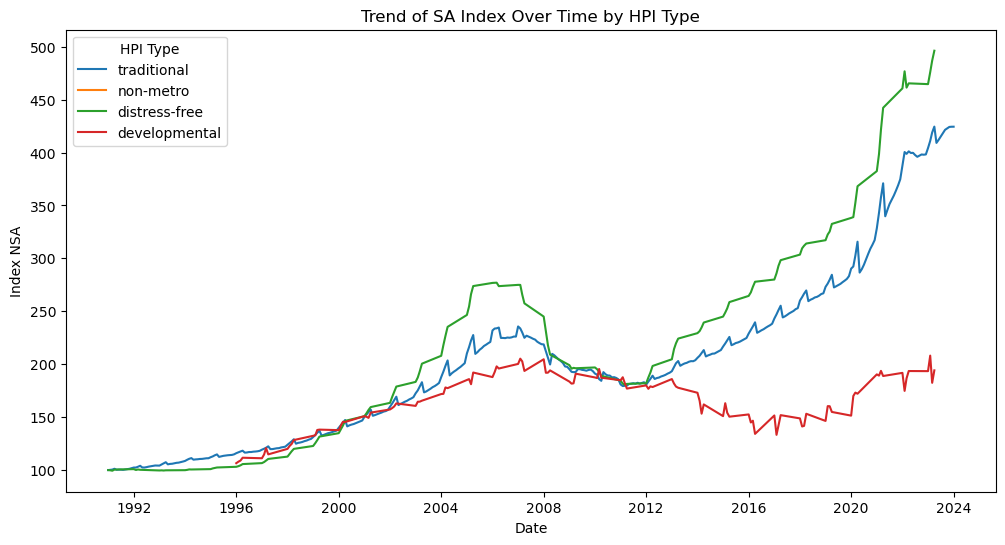

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'yr' and 'period' to datetime
data['date'] = pd.to_datetime(data['yr'].astype(str) + '-' + data['period'].astype(str))

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='index_sa', hue='hpi_type', ci=None)
plt.title('Trend of SA Index Over Time by HPI Type')
plt.xlabel('Date')
plt.ylabel('Index NSA')
plt.legend(title='HPI Type')
plt.show()


# Plot the trend of the NSA index over time with different lines for each hpi_flavor

/var/folders/fn/y37l7tw52bs7r94fz3jsnwc40000gq/T/ipykernel_2941/2368468937.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='date', y='index_nsa', hue='hpi_flavor', ci=None)


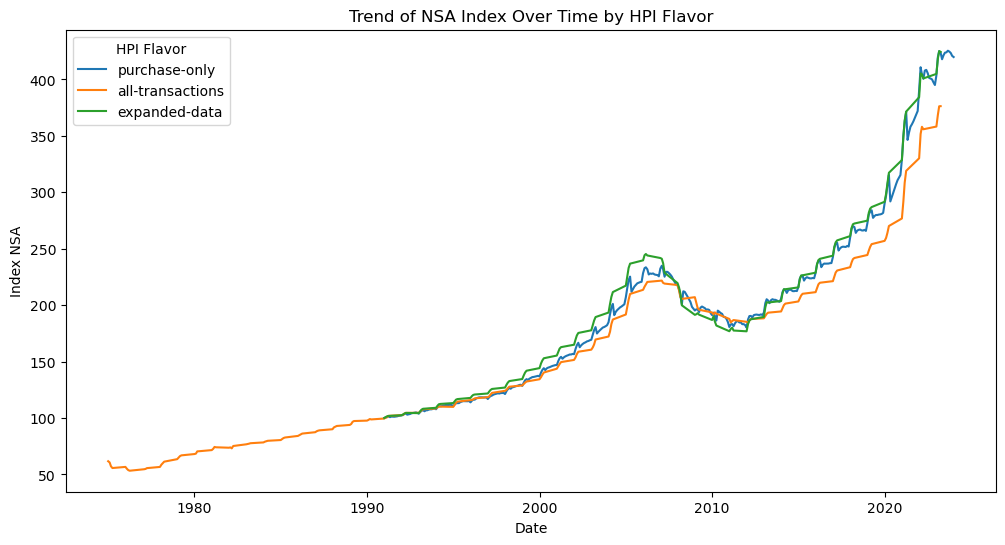

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'yr' and 'period' to datetime
data['date'] = pd.to_datetime(data['yr'].astype(str) + '-' + data['period'].astype(str))

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='index_nsa', hue='hpi_flavor', ci=None)
plt.title('Trend of NSA Index Over Time by HPI Flavor')
plt.xlabel('Date')
plt.ylabel('Index NSA')
plt.legend(title='HPI Flavor')
plt.show()


# Plot the trend of the SA index over time with different lines for each hpi_flavor

/var/folders/fn/y37l7tw52bs7r94fz3jsnwc40000gq/T/ipykernel_2941/518942959.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='date', y='index_sa', hue='hpi_flavor', ci=None)


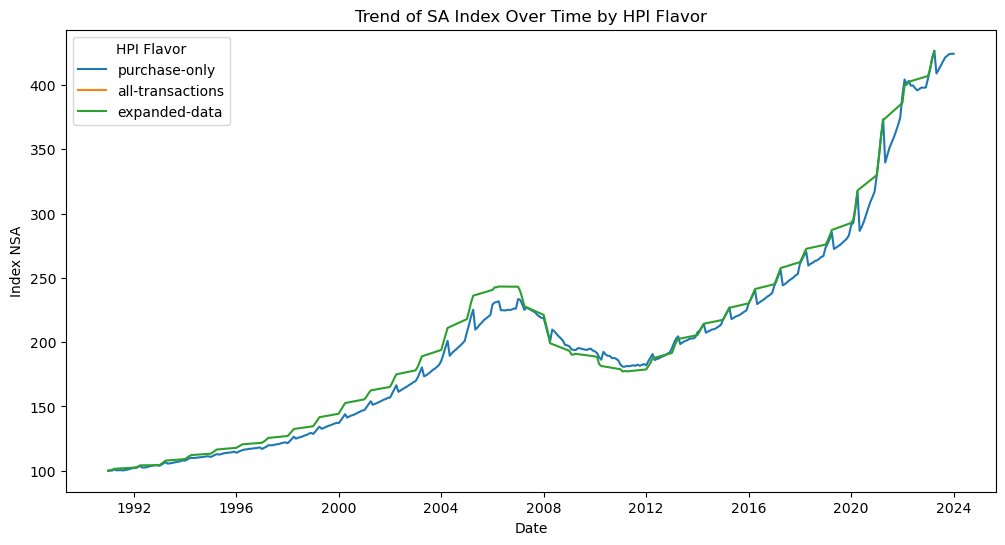

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'yr' and 'period' to datetime
data['date'] = pd.to_datetime(data['yr'].astype(str) + '-' + data['period'].astype(str))

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='index_sa', hue='hpi_flavor', ci=None)
plt.title('Trend of SA Index Over Time by HPI Flavor')
plt.xlabel('Date')
plt.ylabel('Index NSA')
plt.legend(title='HPI Flavor')
plt.show()


In [19]:
import pandas as pd
# Group the data by year and period
grouped_data = data.groupby(['yr', 'period'])

# Calculate summary statistics for index values
summary_stats = grouped_data['index_nsa', 'index_sa'].agg(['mean', 'median', 'min', 'max'])

/var/folders/fn/y37l7tw52bs7r94fz3jsnwc40000gq/T/ipykernel_2941/763388734.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary_stats = grouped_data['index_nsa', 'index_sa'].agg(['mean', 'median', 'min', 'max'])


# Plot the mean index values over time

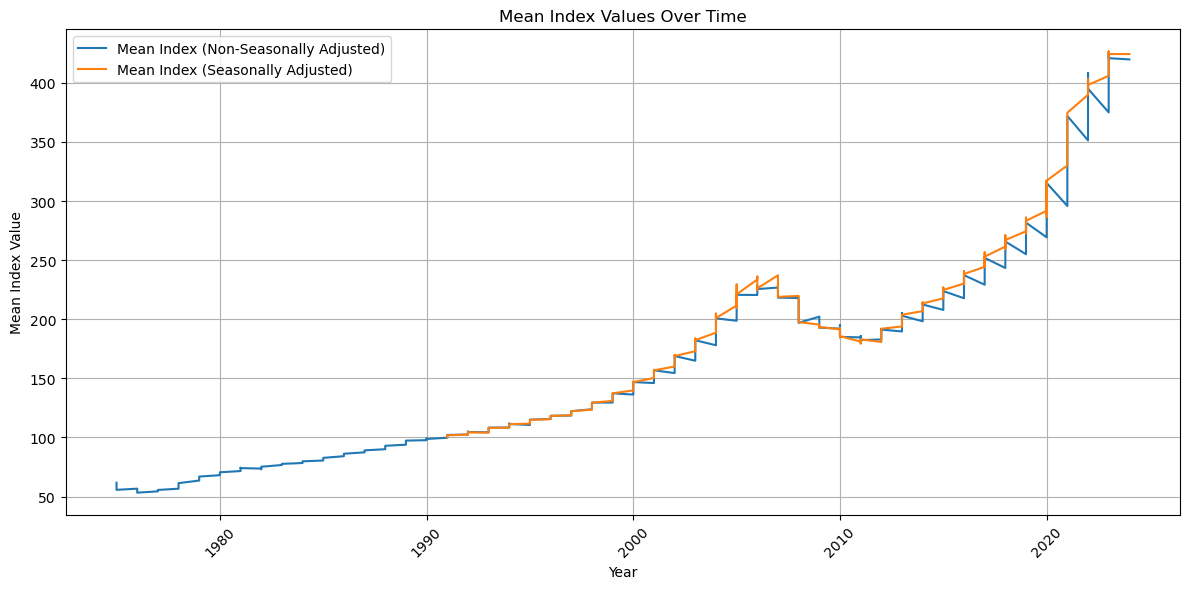

In [20]:
import matplotlib.pyplot as plt

# Extracting summary statistics for visualization
mean_index_nsa = summary_stats['index_nsa']['mean'].reset_index(level='period')
mean_index_sa = summary_stats['index_sa']['mean'].reset_index(level='period')

# Line plots for mean index values over time
plt.figure(figsize=(12, 6))
plt.plot(mean_index_nsa['mean'], label='Mean Index (Non-Seasonally Adjusted)')
plt.plot(mean_index_sa['mean'], label='Mean Index (Seasonally Adjusted)')
plt.title('Mean Index Values Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Index Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Observations from the line plots. 
The plots all have a similar visual trajectory and shape. There is a steady line with an increase at 2008 and then a drop until 2012 and then HPI begins to increase again, now at a steeper slop than before 2008. I am curious to see how my models accomodate for the 2008 bump. I am wondering if after 2008, the projections for HPI are less accurate. Or will they specifically be less accurate around 2008? Also, looking at HPI during this time (175-240) will the predictions for this HPI level have more standard devitation? Will there be more error? 

# Create the dependent variable (HPI) using the index_nsa and the month and year as the index

In [22]:
import pandas as pd
# Reset index to make 'yr' a column
mean_index_nsa.reset_index(inplace=True)

# Create dependent_variable DataFrame
dependent_variable = pd.DataFrame({
    'yr': mean_index_nsa['yr'],
    'month': mean_index_nsa['period'],
    'mean': mean_index_nsa['mean']
})


In [23]:
import pandas as pd
# Convert 'yr' and 'month' columns to datetime format
dependent_variable['date'] = pd.to_datetime(dependent_variable['yr'].astype(str) + '-' + dependent_variable['month'].astype(str), format='%Y-%m')

In [24]:
# Set 'date' column as the index
dependent_variable.set_index('date', inplace=True)

In [25]:
# Drop 'yr' and 'month' columns
dependent_variable.drop(['yr', 'month'], axis=1, inplace=True)
# Display the DataFrame
print(dependent_variable)

                  mean
date                  
1975-01-01   61.669677
1975-02-01   60.607031
1975-03-01   57.191644
1975-04-01   55.656329
1976-01-01   56.645732
...                ...
2023-09-01  425.414000
2023-10-01  424.676000
2023-11-01  423.401000
2023-12-01  420.856000
2024-01-01  419.822000

[461 rows x 1 columns]


# print out the lowest and highest index values available

In [52]:
# Find the lowest and highest index values
lowest_index_value = data['index_nsa'].min()
highest_index_value = data['index_nsa'].max()

print("Lowest index value:", lowest_index_value)
print("Highest index value:", highest_index_value)



Lowest index value: 18.48
Highest index value: 1183.99


I Printed the lowest and highest HPI to understand the maximum range housing price index can vary. However, this doesnt show me the range by time, so I need to look at that next. 

# Create a function that finds all the rows that have exactly 100 index so we can confirm the base period for the trned

In [54]:
def find_base_period(data):
    base_periods = []
    
    for index, row in data.iterrows():
        if row['index_nsa'] == 100 and row['index_sa'] == 100:
            base_periods.append(index)
    
    return base_periods

base_periods = find_base_period(data)
print("Base Periods with both indices exactly 100:", base_periods)


Base Periods with both indices exactly 100: [0, 397, 794, 1191, 1588, 1985, 2382, 2779, 3176, 3573, 81647, 81779, 81911, 82043, 82175, 82307, 82439, 82571, 82703, 82835, 82967, 83099, 83231, 83363, 83495, 83627, 83759, 83891, 84023, 84155, 84287, 84419, 84551, 84683, 84815, 84947, 85079, 85211, 85343, 85475, 85607, 85739, 85871, 86003, 86135, 86267, 86399, 86531, 86663, 86795, 86927, 87059, 87191, 87323, 87455, 87587, 87719, 87851, 87983, 88115, 88247, 88379, 88511, 88643, 88775, 88907, 89039, 89171, 89303, 89435, 89567, 89699, 89831, 89963, 90095, 90227, 90359, 90491, 90623, 90755, 90887, 91019, 91151, 91283, 91415, 91547, 91679, 91811, 91943, 92075, 92207, 92339, 92471, 92603, 92735, 92867, 92999, 93131, 93263, 93395, 93527, 93659, 93791, 93923, 94055, 94187, 94319, 94451, 94583, 94715, 94847, 94979, 95111, 95243, 95375, 95507, 95639, 95771, 95903, 96035, 96167, 96299, 96431, 96563, 96695, 96827, 96959, 97091, 97223, 97355, 97487, 97619, 97751, 97883, 98015, 98147, 98279, 98411, 9854

# Print the year and period that is associated with all of these indices to see if they are all from the same year and period

In [55]:
def find_base_period(data):
    base_periods = []
    
    for index, row in data.iterrows():
        if row['index_nsa'] == 100 and row['index_sa'] == 100:
            yr = row['yr']
            period = row['period']
            base_periods.append((yr, period))
    
    return base_periods

# Assuming 'data' is your DataFrame containing the index values
base_periods = find_base_period(data)

print("Base Periods with both indices exactly 100:")
for yr, period in base_periods:
    print("Year:", yr, "Period:", period)


Base Periods with both indices exactly 100:
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 Period: 1
Year: 1991 

We can confirm that 1991 period 1 is the base period for the trend. So HPI was 100 at period one of 1991, so the HPI is based on that for any other time. 

# Use the Fred library to import series that can be explored to look for relationships and predictive power of HPI

In [23]:
from fredapi import Fred

# Initialize the Fred API with your API key
fred = Fred(api_key='4c9ae76ffc8f199050895f84f6ccc400')

# Define the list of FRED series IDs
series_ids = [
    'UNRATE',        # Unemployment Rate
    'CPIAUCSL',      # Consumer Price Index for All Urban Consumers: All Items
    'PCE',           # Personal Consumption Expenditures: Services
    'MORTGAGE30US',  # Mortgage Rates: 30-Year Fixed Rate
    'PERMIT',        # Building Permits
    'GDP',           # Gross Domestic Product
    'MSPUS',         # Median Sales Price of Houses Sold
    'DSPIC96',       # Real Disposable Personal Income
    'RHORUSQ156N',   # Homeownership Rate
    'GS10',          # 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
    'HSN1F',         # New Privately-Owned Housing Units Authorized by Building Permits
    'HOUST',         # Housing Starts: Total New Privately Owned Housing Units Started
    'WPSID62',       # Number of Households: Owner Occupied Housing Units: Median Value
    'PPICPE',        # Producer Price Index by Commodity: All Commodities
    'CSCICP03USM665S',  # Consumer Sentiment Index
    'POP',           # Population
    'CP',            # Construction Payroll Employment
    'CUMFNS',        # Capacity Utilization: Manufacturing
]

# Fetch and print data for each series ID
for series_id in series_ids:
    try:
        data = fred.get_series(series_id)
        start_date = data.index[0]
        end_date = data.index[-1]
        print(f"Series ID: {series_id}")
        print(f"Start Date: {start_date}")
        print(f"End Date: {end_date}")
        print("----------------------")
    except ValueError as e:
        print(f"Error fetching data for series ID '{series_id}': {e}")


Series ID: UNRATE
Start Date: 1948-01-01 00:00:00
End Date: 2024-03-01 00:00:00
----------------------
Series ID: CPIAUCSL
Start Date: 1947-01-01 00:00:00
End Date: 2024-03-01 00:00:00
----------------------
Series ID: PCE
Start Date: 1959-01-01 00:00:00
End Date: 2024-03-01 00:00:00
----------------------
Series ID: MORTGAGE30US
Start Date: 1971-04-02 00:00:00
End Date: 2024-04-25 00:00:00
----------------------
Series ID: PERMIT
Start Date: 1960-01-01 00:00:00
End Date: 2024-03-01 00:00:00
----------------------
Series ID: GDP
Start Date: 1946-01-01 00:00:00
End Date: 2024-01-01 00:00:00
----------------------
Series ID: MSPUS
Start Date: 1963-01-01 00:00:00
End Date: 2023-10-01 00:00:00
----------------------
Series ID: DSPIC96
Start Date: 1959-01-01 00:00:00
End Date: 2024-03-01 00:00:00
----------------------
Series ID: RHORUSQ156N
Start Date: 1965-01-01 00:00:00
End Date: 2024-01-01 00:00:00
----------------------
Series ID: GS10
Start Date: 1953-04-01 00:00:00
End Date: 2024-03-

In [33]:
from fredapi import Fred
import pandas as pd

# Initialize the Fred API with your API key
fred = Fred(api_key='4c9ae76ffc8f199050895f84f6ccc400')

# Define the list of FRED series IDs
series_ids = [
    'UNRATE',        # Unemployment Rate
    'CPIAUCSL',      # Consumer Price Index for All Urban Consumers: All Items
    'PCE',           # Personal Consumption Expenditures: Services
    'MORTGAGE30US',  # Mortgage Rates: 30-Year Fixed Rate
    'PERMIT',        # Building Permits
    'GDP',           # Gross Domestic Product
    'MSPUS',         # Median Sales Price of Houses Sold
    'DSPIC96',       # Real Disposable Personal Income
    'RHORUSQ156N',   # Homeownership Rate
    'GS10',          # 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
    'HSN1F',         # New Privately-Owned Housing Units Authorized by Building Permits
    'HOUST',         # Housing Starts: Total New Privately Owned Housing Units Started
    'WPSID62',       # Number of Households: Owner Occupied Housing Units: Median Value
    'PPICPE',        # Producer Price Index by Commodity: All Commodities
    'CSCICP03USM665S',  # Consumer Sentiment Index
    'POP',           # Population
    'CP',            # Construction Payroll Employment
    'CUMFNS',        # Capacity Utilization: Manufacturing
]

# Create a dictionary to store each series as its own DataFrame
data_frames = {}

# Fetch and store data for each series ID
for series_id in series_ids:
    try:
        # Fetch data for the current series ID
        data = fred.get_series(series_id)
        # Reindex the data to ensure consistent timestamps
        data = data.reindex(pd.date_range(start=data.index[0], end=data.index[-1]))
        # Store the data in the dictionary
        data_frames[series_id] = pd.DataFrame({series_id: data})
    except ValueError as e:
        print(f"Error fetching data for series ID '{series_id}': {e}")


### Explore the combined data to understand the trends and relationships between different economic indicators and housing prices. 

- Visualize trends over time: Plotting the time series data for each variable can help us understand how they have changed over time.

- Correlation analysis: Calculating the correlation between different variables can help identify which economic indicators are most closely related to housing prices.

- Seasonal decomposition: Decomposing the time series into trend, seasonal, and residual components can provide insights into the underlying patterns in the data.

- Regression analysis: Building regression models to predict housing prices based on other economic indicators can help understand the relationships between variables and their predictive power.

### Visualize trends over time

## Interpolate the missing values in each DataFrame and then visualize the trends over time.

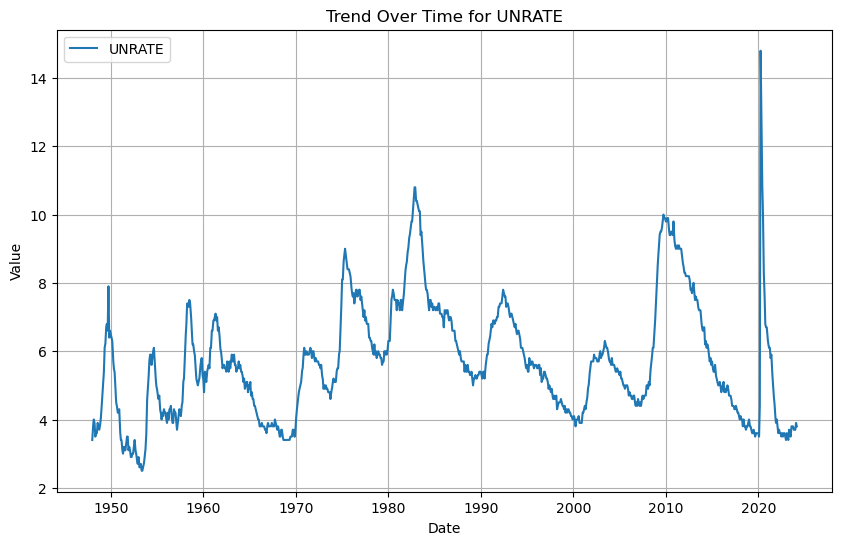

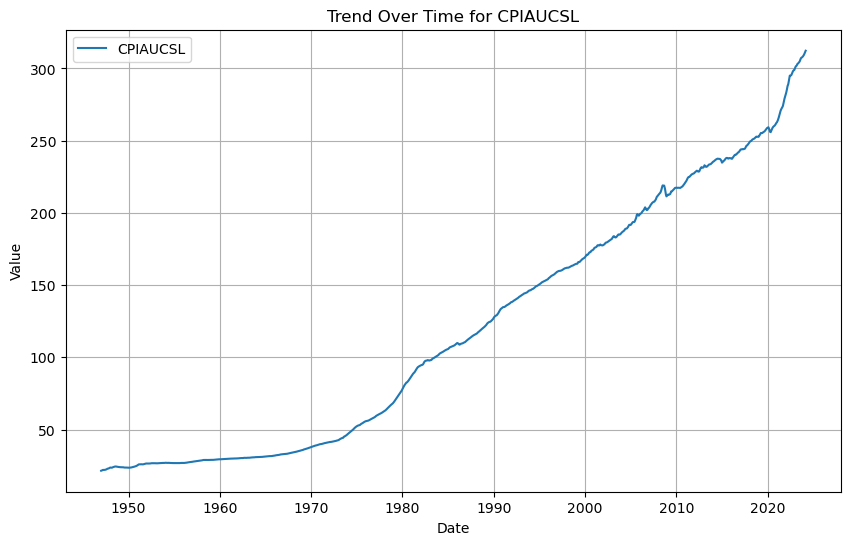

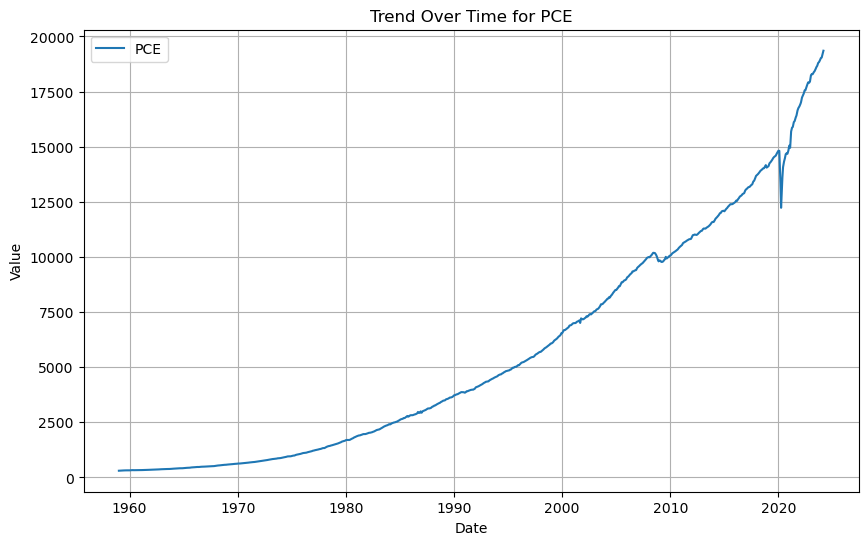

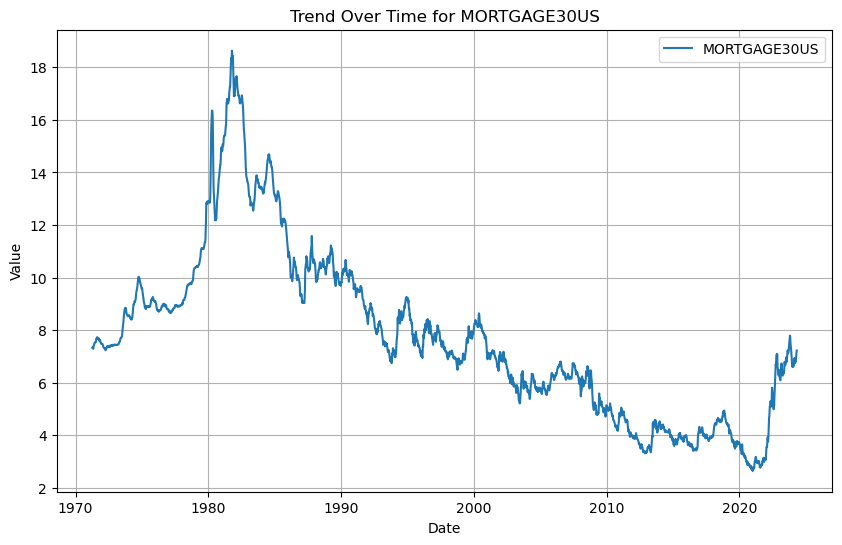

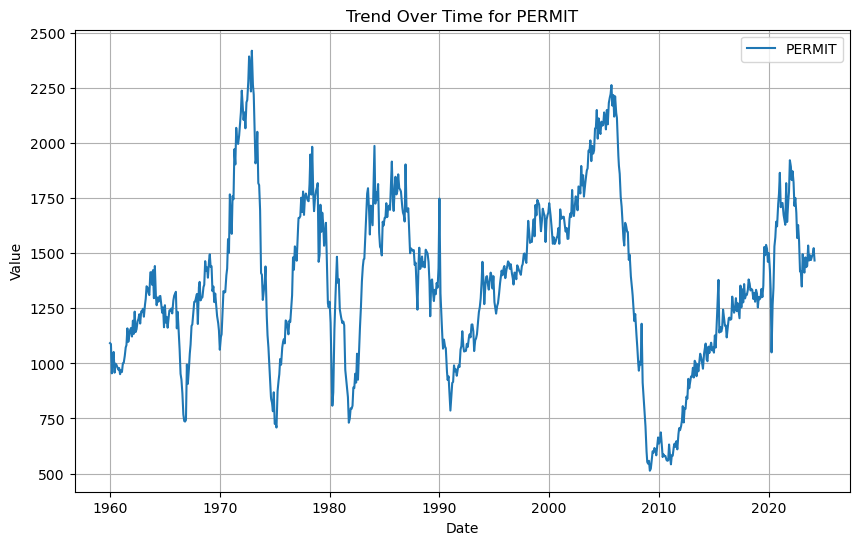

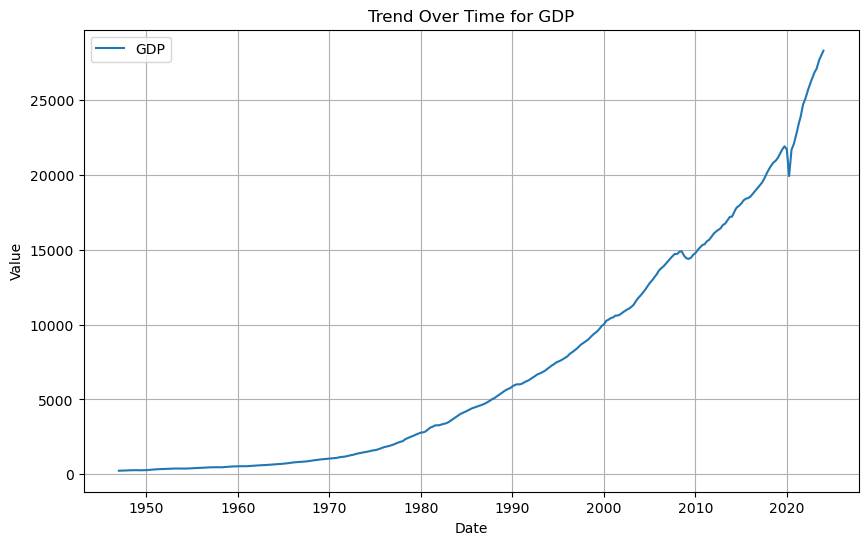

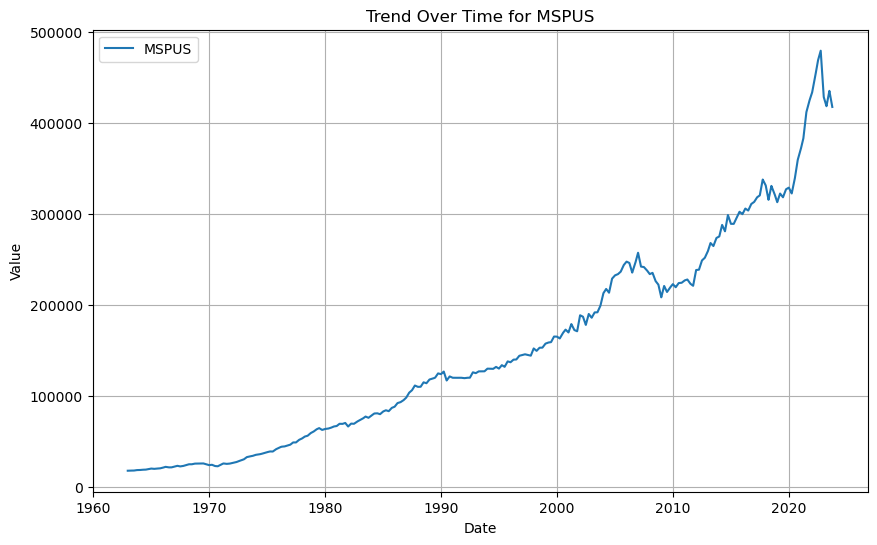

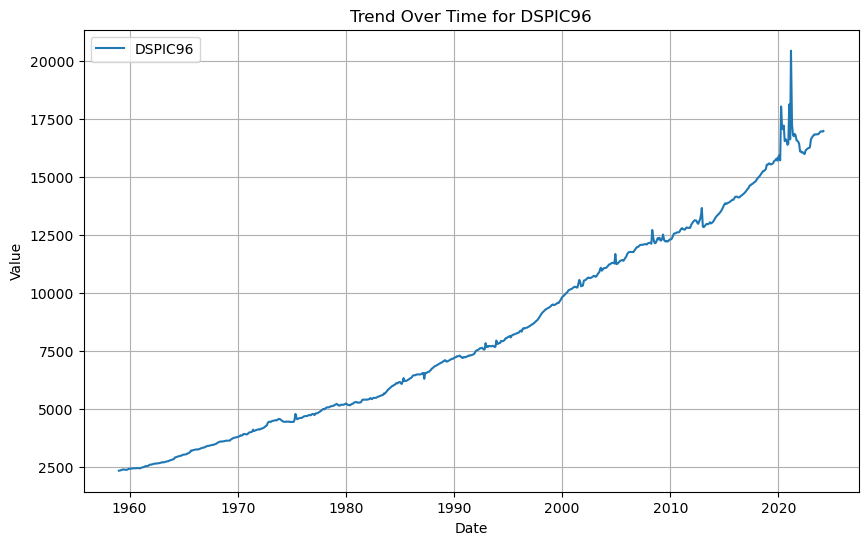

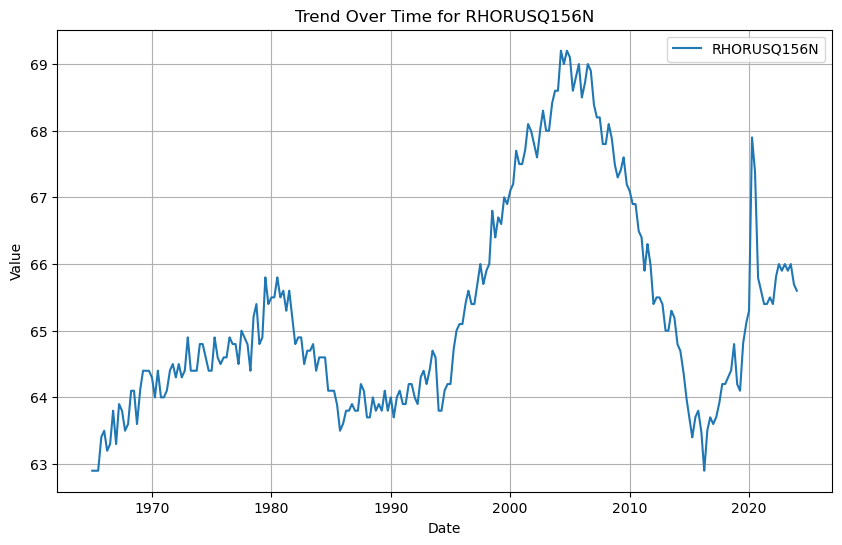

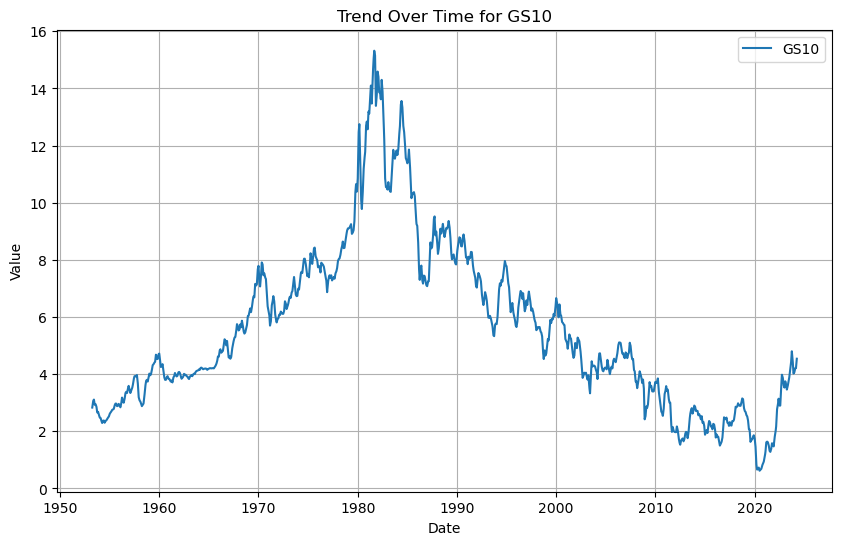

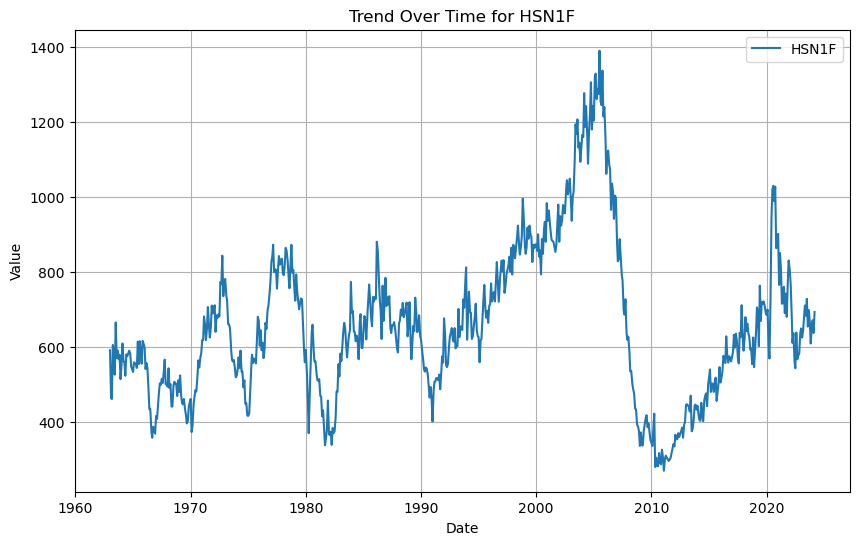

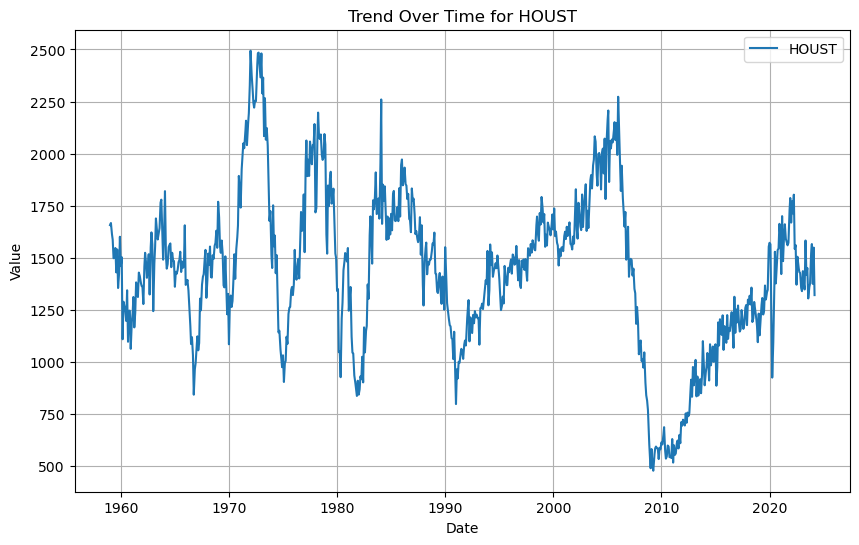

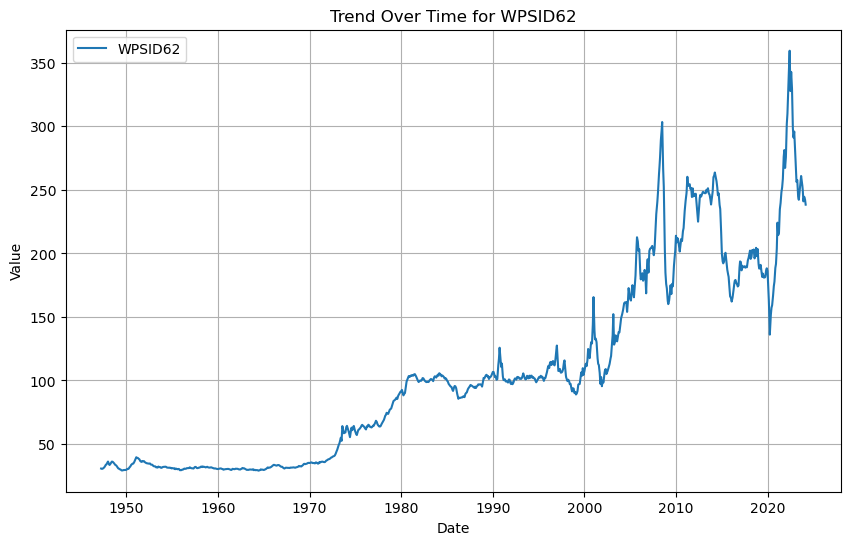

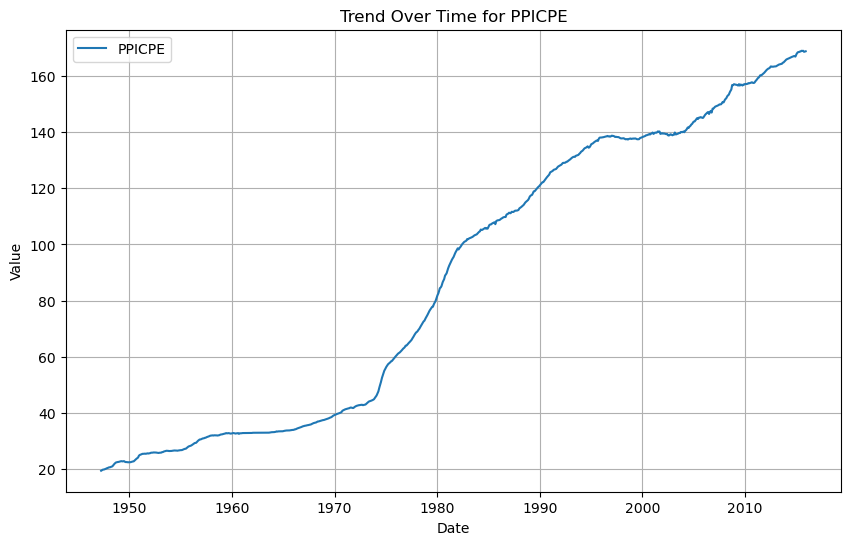

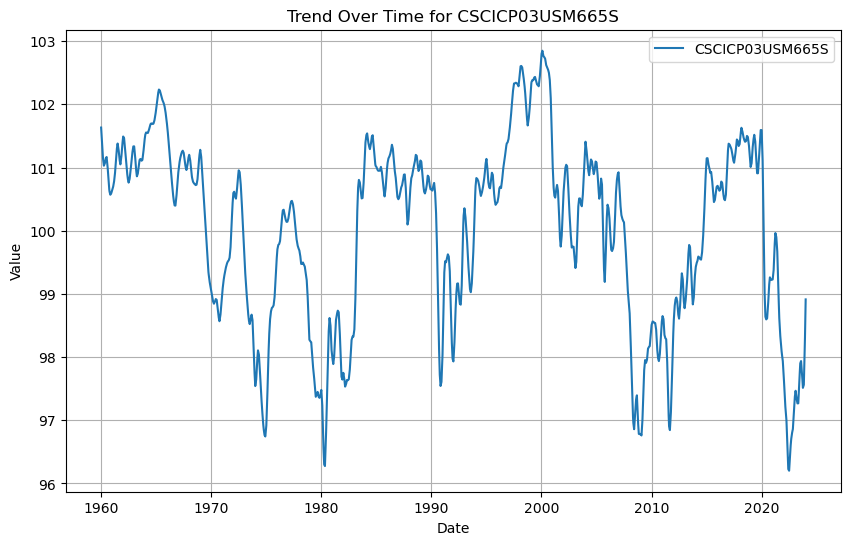

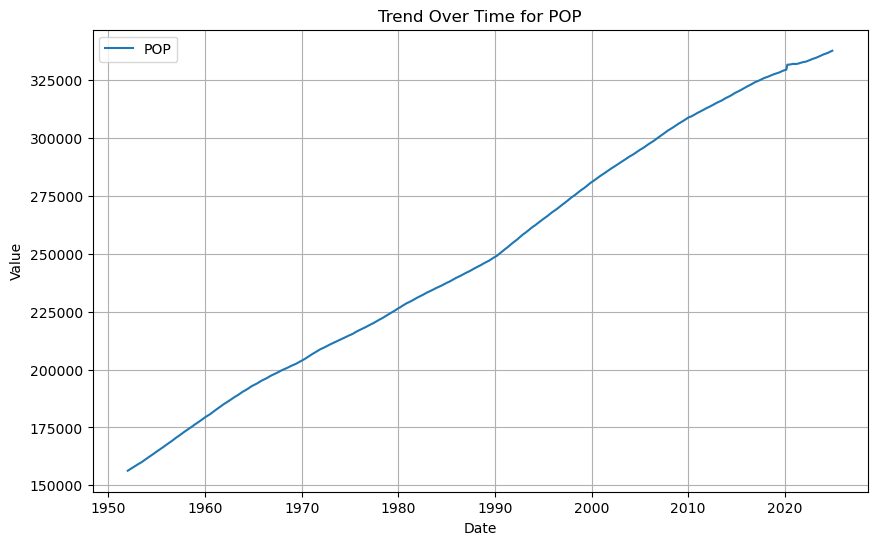

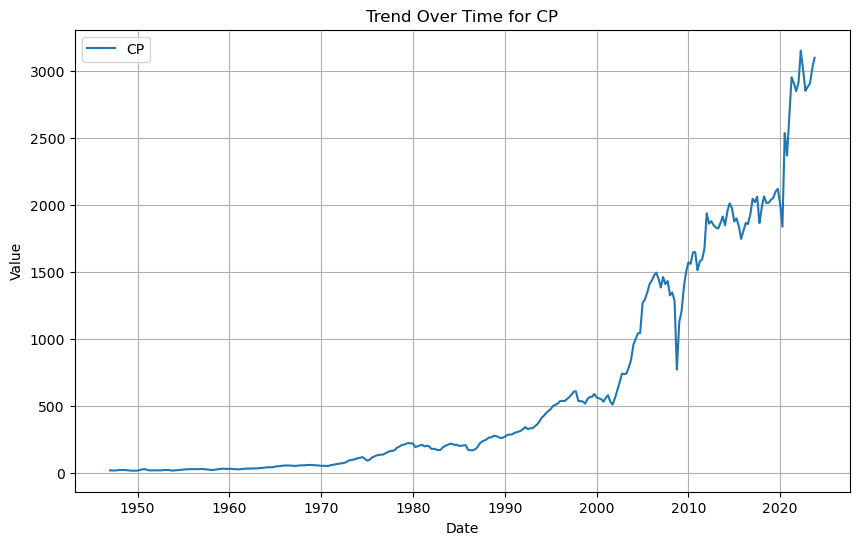

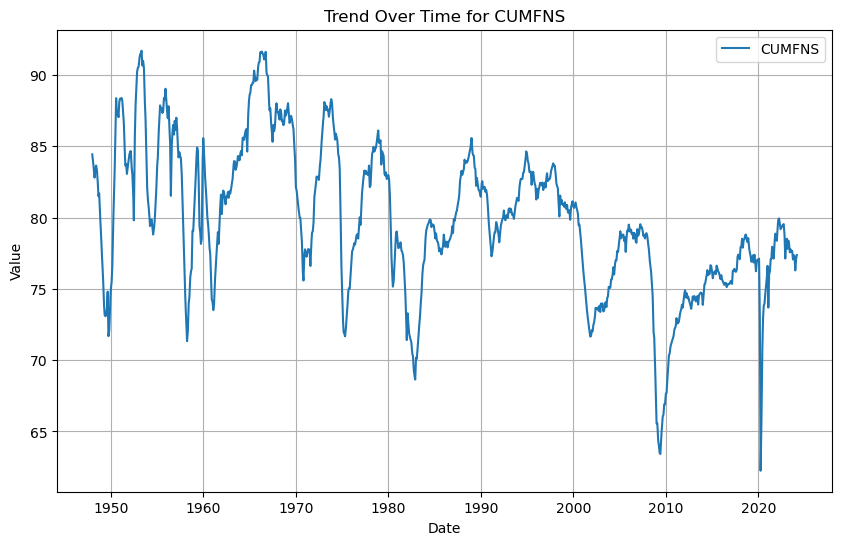

In [37]:
import matplotlib.pyplot as plt

# Interpolate missing values in each DataFrame using linear interpolation
for series_id, df in data_frames.items():
    data_frames[series_id] = df.interpolate(method='linear')

# Plot the trends over time for each DataFrame
for series_id, df in data_frames.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[series_id], label=series_id)
    plt.title(f"Trend Over Time for {series_id}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


##  Apply a logarithmic transformation to the values in each DataFrame and then plot all the series on one graph for easy comparison

In this case, the explanatory variables were transformed into logarithmic scale to mitigate the impact of differences in scale among the variables. When predictor variables have different scales, it can affect the performance of certain machine learning algorithms, particularly those that are sensitive to the scale of the features, such as linear regression.

By applying a logarithmic transformation, the range of values for each variable is compressed, making them more comparable in scale. This can lead to more stable and reliable model performance, especially when using techniques like linear regression where the scale of the variables can influence the coefficients and model fit.

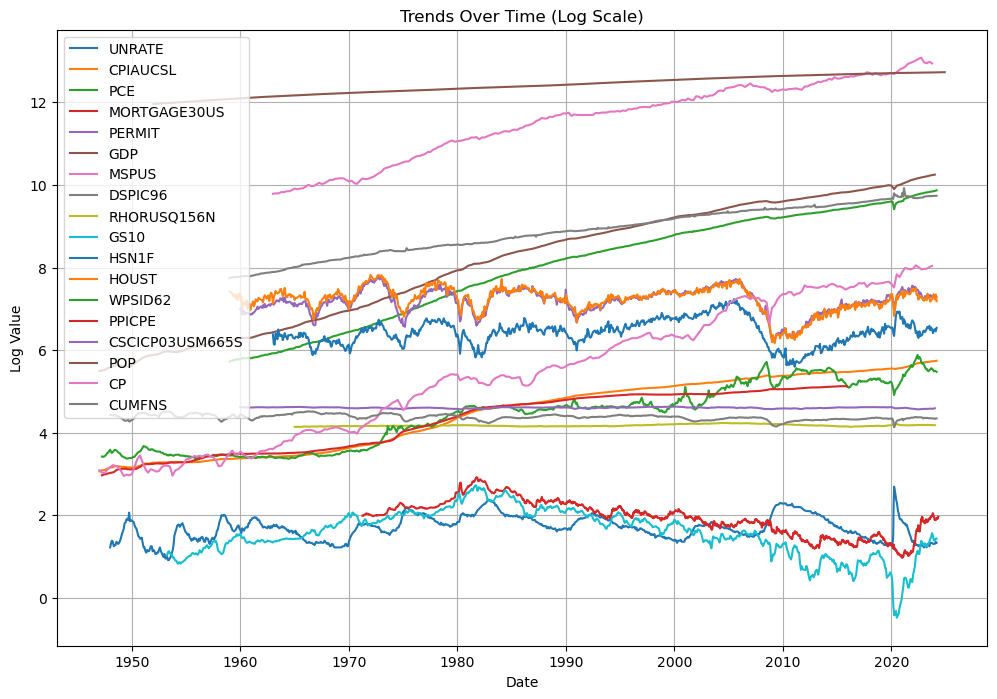

In [26]:
import numpy as np

# Apply logarithmic transformation to each DataFrame
for series_id, df in data_frames.items():
    data_frames[series_id] = np.log(df)

# Plot all the series on one graph
plt.figure(figsize=(12, 8))
for series_id, df in data_frames.items():
    plt.plot(df.index, df[series_id], label=series_id)

plt.title("Trends Over Time (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Log Value")
plt.legend()
plt.grid(True)
plt.show()

# Observations from log transformed series over time:

This is ideally too many data series on one plot, but I purposelly wanted to visualize all of them on one plot to see if the trends soley to find if they largely worked in similar trends and seasonal patterns. If they were not log transformed I wouldnt be able to compare their trends because they all work in different value ranges. This allows me to see that there are discrepancies in their slopes but overall the slopes are level or positive. 

## Combine the individual DataFrames into one DataFrame and then perform correlation analysis

In [44]:
import pandas as pd

# Combine all DataFrames into one DataFrame
combined_data = pd.concat(data_frames.values(), axis=1)

# Calculate correlation matrix
correlation_matrix = combined_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                   UNRATE  CPIAUCSL       PCE  MORTGAGE30US    PERMIT  \
UNRATE           1.000000  0.105259 -0.120886      0.304312 -0.350222   
CPIAUCSL         0.105259  1.000000  0.973603     -0.725149 -0.030220   
PCE             -0.120886  0.973603  1.000000     -0.750558 -0.028381   
MORTGAGE30US     0.304312 -0.725149 -0.750558      1.000000  0.035438   
PERMIT          -0.350222 -0.030220 -0.028381      0.035438  1.000000   
GDP              0.016700  0.976804  0.999775     -0.752011 -0.025378   
MSPUS           -0.128775  0.972368  0.992787     -0.734891 -0.022126   
DSPIC96         -0.061613  0.988235  0.985183     -0.779597 -0.000984   
RHORUSQ156N      0.027466  0.430192  0.370651     -0.275675  0.228789   
GS10             0.309944 -0.369003 -0.613063      0.985143  0.100868   
HSN1F           -0.283040  0.143597  0.097515     -0.109925  0.808827   
HOUST           -0.330927 -0.307242 -0.289398      0.183068  0.941431   
WPSID62          0.156069  0.943200  0.923646     -

## Use the describe() method in pandas to get summary statistics for each column in the combined_data DataFrame. Additionally, you can use the isna().sum() method to count the number of NaN values in each column

In [29]:
# Calculate summary statistics
summary_stats = combined_data.describe()

# Count the number of NaN values in each column
nan_counts = combined_data.isna().sum()

# Combine summary statistics and NaN counts
summary_stats['NaN Count'] = nan_counts

# Print the summary statistics
print(summary_stats)

             UNRATE      CPIAUCSL           PCE  MORTGAGE30US        PERMIT  \
count  27820.000000  28185.000000  23802.000000  19383.000000  23437.000000   
mean       1.697712      4.456184      8.037762      1.957829      7.181625   
std        0.292640      0.866017      1.250087      0.424235      0.301287   
min        0.916291      3.067122      5.723912      0.974560      6.240276   
25%        1.481605      3.475604      6.915670      1.647146      7.021545   
50%        1.707676      4.681205      8.286358      2.000128      7.210866   
75%        1.909781      5.255646      9.191144      2.246166      7.407560   
max        2.694627      5.743740      9.870494      2.924773      7.791110   

                GDP         MSPUS       DSPIC96   RHORUSQ156N          GS10  \
count  28125.000000  22189.000000  23802.000000  21550.000000  25903.000000   
mean       8.083024     11.579500      8.873350      4.178453      1.572686   
std        1.451633      0.925585      0.571598    

##  print pairs that are correlated higher than 0.5

In [30]:
# Set threshold for correlation
threshold = 0.5

# Find pairs with correlation higher than threshold
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print pairs with correlation higher than threshold
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")


UNRATE - CUMFNS: -0.6396725047151547
CPIAUCSL - PCE: 0.9968267218064226
CPIAUCSL - MORTGAGE30US: -0.6776344223800701
CPIAUCSL - GDP: 0.9953328713064514
CPIAUCSL - MSPUS: 0.9942904660314066
CPIAUCSL - DSPIC96: 0.9816491977585912
CPIAUCSL - WPSID62: 0.9721650847611139
CPIAUCSL - PPICPE: 0.9914037075859246
CPIAUCSL - POP: 0.980880162403689
CPIAUCSL - CP: 0.9814441517596404
CPIAUCSL - CUMFNS: -0.5478036347190224
PCE - MORTGAGE30US: -0.7389251264190577
PCE - GDP: 0.9998925333268748
PCE - MSPUS: 0.9971778145009864
PCE - DSPIC96: 0.9932572508572269
PCE - WPSID62: 0.9658011146859116
PCE - PPICPE: 0.9803887260499033
PCE - POP: 0.9918279240208778
PCE - CP: 0.9838611099505157
PCE - CUMFNS: -0.5517848613102827
MORTGAGE30US - GDP: -0.7384431805398362
MORTGAGE30US - MSPUS: -0.726945404257518
MORTGAGE30US - DSPIC96: -0.812088722707053
MORTGAGE30US - GS10: 0.973047761701617
MORTGAGE30US - WPSID62: -0.656247617763003
MORTGAGE30US - POP: -0.8110491646987982
MORTGAGE30US - CP: -0.8173070169157208
PERMIT 

# Go through the correlation matrix and identify which variables to keep based on their relevance to predicting HPI and their correlation with each other:

UNRATE: Unemployment Rate

CPIAUCSL: Consumer Price Index for All Urban Consumers: All Items

MORTGAGE30US: Mortgage Rates: 30-Year Fixed Rate

PERMIT: Building Permits

MSPUS: Median Sales Price of Houses Sold

RHORUSQ156N: Homeownership Rate

GS10: 10-Year Treasury Constant Maturity Minus 2-Year Treasury 
Constant Maturity

HSN1F: New Privately-Owned Housing Units Authorized by Building 

Permits

HOUST: Housing Starts: Total New Privately Owned Housing Units 
Started

WPSID62: Number of Households: Owner Occupied Housing Units: Median Value

PPICPE: Producer Price Index by Commodity: All Commodities

POP: Population

CP: Construction Payroll Employment

CSCICP03USM665S: Consumer Sentiment Index

CUMFNS: Capacity Utilization: Manufacturing

### Variables Highly Correlated with HPI:

MSPUS

RHORUSQ156N

WPSID62

PPICPE

POP

CP

### Based on the above analysis, we can remove the following variables to mitigate multicollinearity while retaining the most relevant predictors for predicting HPI:

- CPIAUCSL
- PCE
- GDP
- DSPIC96
- MORTGAGE30US
- CUMFNS

In [83]:
# List of columns to drop
columns_to_drop = ['CPIAUCSL', 'PCE', 'GDP', 'DSPIC96', 'MORTGAGE30US', 'CUMFNS']

# Drop the specified columns
combined_data.drop(columns_to_drop, axis=1, inplace=True)

# Display the DataFrame after dropping columns
print(combined_data)

              UNRATE    PERMIT      MSPUS  RHORUSQ156N      GS10     HSN1F  \
1975-01-31  2.091864  6.591541  10.555813     4.167698  2.000608  6.044547   
1975-02-01  2.091864  6.591674  10.556073     4.167784  2.000128  6.045005   
1975-02-02  2.094066  6.590693  10.556333     4.167870  2.001770  6.049649   
1975-02-03  2.096264  6.589712  10.556594     4.167956  2.003409  6.054272   
1975-02-04  2.098456  6.588730  10.556854     4.168042  2.005045  6.058873   
...              ...       ...        ...          ...       ...       ...   
2024-11-27       NaN       NaN        NaN          NaN       NaN       NaN   
2024-11-28       NaN       NaN        NaN          NaN       NaN       NaN   
2024-11-29       NaN       NaN        NaN          NaN       NaN       NaN   
2024-11-30       NaN       NaN        NaN          NaN       NaN       NaN   
2024-12-01       NaN       NaN        NaN          NaN       NaN       NaN   

               HOUST   WPSID62    PPICPE  CSCICP03USM665S      

In [34]:
# Shift the index of dependent_variable by one day forward
# Resample dependent_variable to monthly frequency
dependent_variable_monthly = dependent_variable.resample('M').first()

### Ensure the combined data starts at the same date as the HPI data

In [84]:
# Select rows starting from January 31, 1975
combined_data = combined_data.loc['1975-01-31':]

# Check the first few rows to verify the selection
print(combined_data.head())

              UNRATE    PERMIT      MSPUS  RHORUSQ156N      GS10     HSN1F  \
1975-01-31  2.091864  6.591541  10.555813     4.167698  2.000608  6.044547   
1975-02-01  2.091864  6.591674  10.556073     4.167784  2.000128  6.045005   
1975-02-02  2.094066  6.590693  10.556333     4.167870  2.001770  6.049649   
1975-02-03  2.096264  6.589712  10.556594     4.167956  2.003409  6.054272   
1975-02-04  2.098456  6.588730  10.556854     4.168042  2.005045  6.058873   

               HOUST   WPSID62    PPICPE  CSCICP03USM665S        POP        CP  
1975-01-31  6.811386  4.059664  4.037490         4.577648  12.278675  4.567191  
1975-02-01  6.806829  4.058717  4.037774         4.577782  12.278696  4.567734  
1975-02-02  6.810339  4.058224  4.038089         4.577974  12.278718  4.568275  
1975-02-03  6.813837  4.057730  4.038404         4.578165  12.278740  4.568817  
1975-02-04  6.817322  4.057236  4.038719         4.578357  12.278762  4.569358  


## Truncate the combined_data DataFrame to stop at 2023-04-01 and then resample it to monthly frequency, you can use the truncate method followed by the resample method

In [47]:
# Truncate combined_data to stop at 2023-04-01
combined_data_truncated = combined_data.truncate(after='2024-01-31')

# Resample to monthly frequency
combined_data_monthly = combined_data_truncated.resample('M').mean()


combined_data_monthly

,UNRATE,CPIAUCSL,PCE,MORTGAGE30US,PERMIT,GDP,MSPUS,DSPIC96,RHORUSQ156N,GS10,HSN1F,HOUST,WPSID62,PPICPE,CSCICP03USM665S,POP,CP,CUMFNS
1946-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,3.800000,307.405450,18808.561667,7.196905,1478.600000,27898.557946,420682.065217,16831.525000,65.750543,4.583000,684.466667,1365.666667,258.850233,NaN,97.633316,335608.793317,3083.091098,77.367618
2023-10-31,3.751613,307.769548,18863.670968,7.616406,1480.354839,28010.394739,417700.000000,16878.912903,65.683696,4.654839,640.483871,1441.806452,254.061516,NaN,97.536574,335770.543548,3096.319000,77.208265
2023-11-30,3.700000,308.371033,18956.505000,7.439476,1476.733333,28118.968109,NaN,16928.726667,65.650543,4.268000,630.750000,1538.100000,246.317617,NaN,97.826830,335922.247750,NaN,77.327770
2023-12-31,3.700000,309.198290,19023.425806,6.854470,1488.870968,28227.541478,NaN,16946.935484,65.617391,4.039355,662.225806,1473.580645,242.738452,NaN,98.498379,336067.715742,NaN,76.807626


In [86]:
print("Missing Values in Combined Data:")
print(combined_data_monthly.isnull().sum())

print("\nInfinite Values in Combined Data:")
print((combined_data_monthly == float('inf')).sum())


Missing Values in Combined Data:
UNRATE              0
PERMIT              0
MSPUS               3
RHORUSQ156N         0
GS10                0
HSN1F               0
HOUST               0
WPSID62             0
PPICPE             97
CSCICP03USM665S     0
POP                 0
CP                  3
dtype: int64

Infinite Values in Combined Data:
UNRATE             0
PERMIT             0
MSPUS              0
RHORUSQ156N        0
GS10               0
HSN1F              0
HOUST              0
WPSID62            0
PPICPE             0
CSCICP03USM665S    0
POP                0
CP                 0
dtype: int64


In [48]:

# Interpolate missing values
combined_data_monthly_interpolated = combined_data_monthly.interpolate(method='linear')
dependent_variable_monthly_interpolated = dependent_variable_monthly.interpolate(method='linear')

In [88]:
print("NaN Values in combined_data_monthly_interpolated:")
print(combined_data_monthly_interpolated.isnull().sum())

print("\nNaN Values in dependent_variable_monthly_interpolated:")
print(dependent_variable_monthly_interpolated.isnull().sum())


NaN Values in combined_data_monthly_interpolated:
UNRATE             0
PERMIT             0
MSPUS              0
RHORUSQ156N        0
GS10               0
HSN1F              0
HOUST              0
WPSID62            0
PPICPE             0
CSCICP03USM665S    0
POP                0
CP                 0
dtype: int64

NaN Values in dependent_variable_monthly_interpolated:
mean    0
dtype: int64


# Regression analysis: 
Building regression models to predict housing prices based on other economic indicators can help understand the relationships between variables and their predictive power.

### Perform linear regression using dependent_variable_monthly_interpolated as the dependent variable and combined_data_monthly_interpolated as the independent variables

In [89]:
import statsmodels.api as sm

# Add a constant column to the independent variables
explanatory_variables = sm.add_constant(combined_data_monthly_interpolated)

# Fit the regression model
model = sm.OLS(dependent_variable_monthly_interpolated, explanatory_variables)
results = model.fit()

# Print regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1347.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        13:20:38   Log-Likelihood:                -2476.0
No. Observations:                 589   AIC:                             4978.
Df Residuals:                     576   BIC:                             5035.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2196.7891    664.630     

# Observations on the regression results:

### Overall Fit: 
The model has a high R-squared value of 0.966, indicating that it explains about 96.6% of the variance in the dependent variable. However, despite the high R-squared, it's essential to examine the statistical significance of individual coefficients.

### Statistical Significance: 
While the overall model fit is strong, not all independent variables may be statistically significant in explaining the variation in the dependent variable. We need to focus on the p-values associated with each coefficient to determine their significance.

### P-values: 
The p-values (P>|t|) associated with each coefficient represent the probability of observing the coefficient value if the null hypothesis (the coefficient is zero) is true. Coefficients with p-values less than the chosen significance level (often 0.05) are typically considered statistically significant.

### Interpretation of Coefficients: 
For coefficients with p-values above 0.05, we should be cautious about interpreting their effects on the dependent variable. In this regression:
- The coefficients of 'UNRATE', 'PERMIT', 'MSPUS', 'RHORUSQ156N', 'GS10', 'WPSID62', 'PPICPE', 'CSCICP03USM665S', and 'POP' have p-values less than 0.05, indicating statistical significance.
- However, the coefficients of 'HSN1F' and 'HOUST' have p-values greater than 0.05, indicating that they are not statistically significant at the 95% confidence level.

### Model Refinement: 
To build a more robust model, it's advisable to exclude variables with p-values greater than 0.05, as their inclusion may not contribute significantly to predicting the dependent variable. This can help in reducing model complexity and improving interpretability without sacrificing predictive power.

### Multicollinearity: 
The model's condition number is large, indicating potential multicollinearity issues among the independent variables. Let's see if removing some variables that are not statistically significant help. 

###  Filter out the independent variables with p-values greater than 0.05 and perform linear regression again

In [90]:
# Filter out independent variables with p-values greater than 0.05
significant_variables = results.pvalues[results.pvalues < 0.05].index.tolist()

# Select only the significant variables from the explanatory variables
significant_explanatory_variables = explanatory_variables[significant_variables]

# Fit the regression model with significant variables
significant_model = sm.OLS(dependent_variable_monthly_interpolated, significant_explanatory_variables)
significant_results = significant_model.fit()

# Print regression results with significant variables
print(significant_results.summary())


                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1787.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        13:24:34   Log-Likelihood:                -2478.8
No. Observations:                 589   AIC:                             4978.
Df Residuals:                     579   BIC:                             5021.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1220.7683    504.508     

# Observations from OLS model with statistically significant varibles 


By filtering out independent variables with p-values greater than 0.05 and performing linear regression again, the model's overall fit remains strong, with a high R-squared value of 0.965. However, the adjusted model includes only the most statistically significant variables, leading to a more parsimonious model.

The refined model now includes nine significant independent variables: UNRATE, PERMIT, MSPUS, RHORUSQ156N, GS10, WPSID62, PPICPE, CSCICP03USM665S, and POP. These variables exhibit statistically significant relationships with the dependent variable, meaning they have a measurable impact on housing prices.

The coefficients of these significant variables provide insights into their effects on housing prices. For example, an increase in unemployment rate (UNRATE) is associated with an increase in housing prices, while an increase in the consumer price index for all urban consumers (PPICPE) is associated with a decrease in housing prices.

Despite the model's strong performance, it's essential to note potential issues such as multicollinearity, indicated by the large condition number. Let's try some other models to see if we can find a better model. 

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(significant_explanatory_variables, dependent_variable_monthly_interpolated, test_size=0.2, random_state=42)

# Fit the regression model with significant variables
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate R-squared for training set
train_r2 = r2_score(y_train, y_train_pred)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_test_pred)

# Calculate mean squared error for training set
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate mean squared error for test set
test_mse = mean_squared_error(y_test, y_test_pred)

print("R-squared (Train):", train_r2)
print("R-squared (Test):", test_r2)
print("Mean Squared Error (Train):", train_mse)
print("Mean Squared Error (Test):", test_mse)


R-squared (Train): 0.9632072689946493
R-squared (Test): 0.9707489019353425
Mean Squared Error (Train): 267.7750522735037
Mean Squared Error (Test): 263.10521379854043


# Title: Evaluating Predictor Variables in Linear Regression Analysis

Introduction:
In linear regression analysis, it is essential to assess the significance of predictor variables to ensure that the model captures the most meaningful relationships with the dependent variable. One common approach is to use p-values, which indicate the probability of observing the data given that the null hypothesis (no effect of the predictor variable) is true.

Methodology:

Initial Regression Analysis: Initially, a linear regression analysis was performed using the dependent_variable_monthly_interpolated as the dependent variable and combined_data_monthly_interpolated as the independent variables. This analysis provided insights into the overall relationship between the variables and their significance levels.
Filtering Significant Variables: Predictor variables with p-values greater than 0.05 were considered statistically insignificant and were subsequently removed from the model. This step aimed to focus on the most influential predictors and enhance the model's predictive power.
Regression Analysis with Significant Variables: A subsequent regression analysis was conducted using only the significant predictor variables identified in the previous step. This refined model aimed to capture the essential relationships while reducing noise from less influential variables.

Results and Discussion:
The initial regression analysis revealed a model with an R-squared value of 0.96, indicating a high level of explained variance. However, upon examining the p-values of individual predictor variables, it became apparent that some variables were not statistically significant.

After filtering out these variables with p-values greater than 0.05 and conducting a regression analysis with the remaining significant variables, the model's R-squared value decreased slightly to 0.963. Despite this slight reduction, the model retained a high level of explanatory power while being more parsimonious.

Conclusion:
Removing predictor variables with p-values greater than 0.05 seems like a prudent decision as it streamlines the model without significantly sacrificing its predictive accuracy. By focusing on statistically significant variables, we ensure that the model captures the most relevant relationships with the dependent variable, thereby enhancing its interpretability and practical utility.

Overall, this approach demonstrates the importance of rigorously evaluating predictor variables in linear regression analysis to construct robust and parsimonious models.

# Now lets try a different model to see how it compares to the regression model

### Fit the PCA model to the data, print out the explained variance ratio for each principal component, and transform the data into the principal component space.

In [92]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(combined_data_monthly_interpolated)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Transform the data to the principal components
transformed_data = pca.transform(combined_data_monthly_interpolated)


Explained Variance Ratio:
Principal Component 1: 0.7943
Principal Component 2: 0.1296
Principal Component 3: 0.0415
Principal Component 4: 0.0135
Principal Component 5: 0.0107
Principal Component 6: 0.0062
Principal Component 7: 0.0026
Principal Component 8: 0.0008
Principal Component 9: 0.0003
Principal Component 10: 0.0001
Principal Component 11: 0.0001
Principal Component 12: 0.0000


### print the loadings of each original variable on each principal component, sorted in descending order of magnitude

In [93]:
# Get the loadings (eigenvectors) for each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=combined_data_monthly_interpolated.columns)

# Print the loadings for each principal component
for i in range(len(loadings)):
    print(f"Principal Component {i+1} Loadings:")
    print(loadings_df.iloc[i].sort_values(ascending=False))
    print()


Principal Component 1 Loadings:
GS10               0.415224
UNRATE             0.079726
HOUST              0.075607
PERMIT             0.032287
HSN1F              0.022666
CSCICP03USM665S    0.000810
RHORUSQ156N       -0.005301
POP               -0.098149
PPICPE            -0.179492
WPSID62           -0.283360
MSPUS             -0.439597
CP                -0.706076
Name: 0, dtype: float64

Principal Component 2 Loadings:
UNRATE             0.328487
WPSID62            0.100518
POP               -0.008306
RHORUSQ156N       -0.011287
PPICPE            -0.013311
CSCICP03USM665S   -0.014538
CP                -0.045787
GS10              -0.050081
MSPUS             -0.128566
HOUST             -0.518434
PERMIT            -0.536571
HSN1F             -0.550991
Name: 1, dtype: float64

Principal Component 3 Loadings:
UNRATE             0.288109
HSN1F              0.142332
HOUST              0.073940
PERMIT             0.055711
CSCICP03USM665S    0.002699
RHORUSQ156N       -0.004614
POP           

# To visually identify the "elbow" or the point where the explained variance starts to level off, create a scree plot. The scree plot displays the explained variance ratio for each principal component.

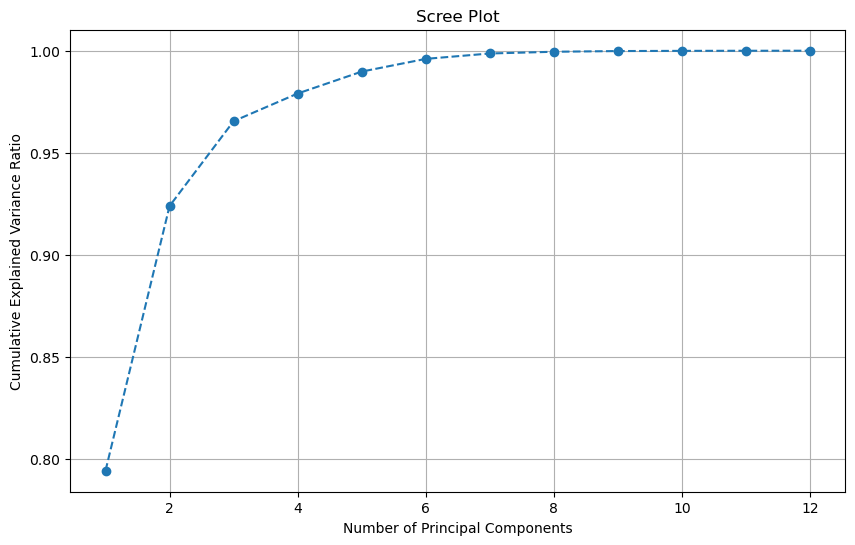

In [94]:
import matplotlib.pyplot as plt

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


This tells me I don't need more than 3 or 4 principal components to explain most of the variance. 

This code will generate three plots:

Scree Plot: Shows the eigenvalues (variance explained by each PC) against the PC number.

Loadings Plot: Visualizes the loadings of each variable on the first six principal components.

Cumulative Variance Explained: Displays the cumulative variance explained by including each successive PC.

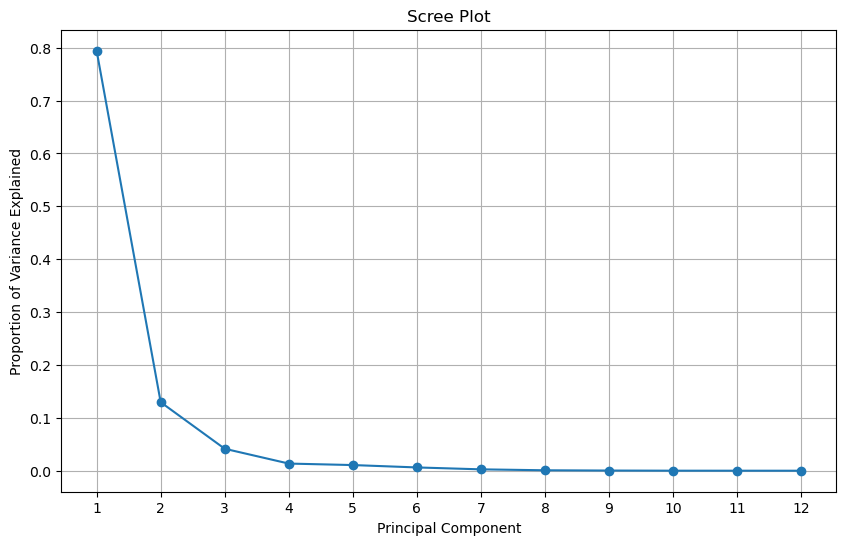

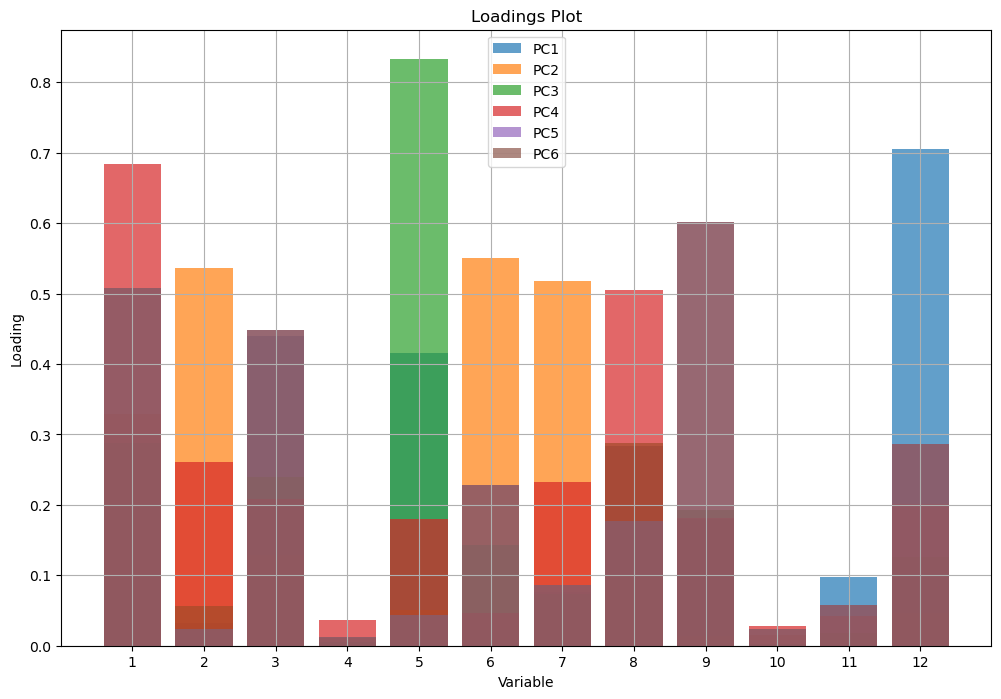

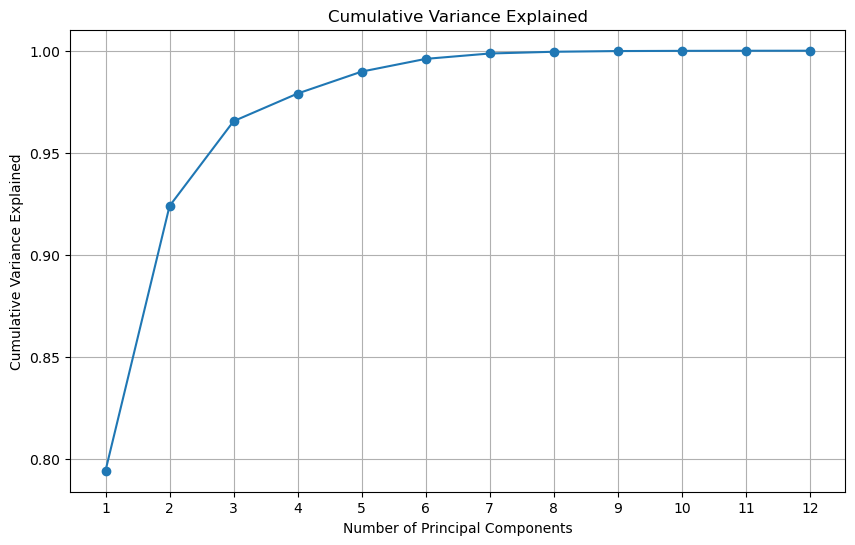

In [95]:

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

# Loadings Plot
plt.figure(figsize=(12, 8))
plt.bar(range(1, len(pca.components_) + 1), np.abs(pca.components_[0]), alpha=0.7, label='PC1')
plt.bar(range(1, len(pca.components_) + 1), np.abs(pca.components_[1]), alpha=0.7, label='PC2')
plt.bar(range(1, len(pca.components_) + 1), np.abs(pca.components_[2]), alpha=0.7, label='PC3')
plt.bar(range(1, len(pca.components_) + 1), np.abs(pca.components_[3]), alpha=0.7, label='PC4')
plt.bar(range(1, len(pca.components_) + 1), np.abs(pca.components_[4]), alpha=0.7, label='PC5')
plt.bar(range(1, len(pca.components_) + 1), np.abs(pca.components_[4]), alpha=0.7, label='PC6')

plt.title('Loadings Plot')
plt.xlabel('Variable')
plt.ylabel('Loading')
plt.xticks(range(1, len(pca.components_) + 1))
plt.legend()
plt.grid(True)
plt.show()

# Cumulative Variance Explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()

### Based on these plots:
I determined that using three principal components would be optimal. In the Scree Plot, I observed an elbow around the third principal component, indicating that retaining three components captures a significant amount of variance. The Loadings Plot showed the contribution of each variable to each principal component, and I noted the loadings for the first six components. Additionally, the Cumulative Variance Explained plot illustrated that including three principal components explains a substantial portion of the total variance while adding more components beyond the third does not significantly increase the explained variance. Therefore, I decided to proceed with three principal components for my analysis. Three principal components explains 96.54% of the variance. 

### Use the first three principal components obtained from the PCA analysis as features to build a linear regression model for predicting HPI 

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Use the first five principal components as features
X = transformed_data[:, :3]
y = dependent_variable_monthly_interpolated

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model_pca = LinearRegression()
model_pca.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_pca = model_pca.predict(X_train)

# Make predictions on the test set
y_test_pred_pca = model_pca.predict(X_test)

# Calculate the mean squared error for training and test sets
train_mse_pca = mean_squared_error(y_train, y_train_pred_pca)
test_mse_pca = mean_squared_error(y_test, y_test_pred_pca)

print("Mean Squared Error (Train):", train_mse_pca)
print("Mean Squared Error (Test):", test_mse_pca)

from sklearn.metrics import r2_score

# Calculate R-squared for training set
train_r2_pca = r2_score(y_train, y_train_pred_pca)

# Calculate R-squared for test set
test_r2_pca = r2_score(y_test, y_test_pred_pca)

print("R-squared (Train):", train_r2_pca)
print("R-squared (Test):", test_r2_pca)



Mean Squared Error (Train): 984.7670773129704
Mean Squared Error (Test): 1211.1797696007388
R-squared (Train): 0.8646913897658617
R-squared (Test): 0.8653453585999704


### Summary of the PCA model 

I used the first three principal components as features to build a linear regression model for predicting the dependent variable. After splitting the data into training and testing sets, I trained the model and evaluated its performance using mean squared error (MSE) and R-squared values. The MSE for the training set was approximately 984.77, while for the test set, it was around 1211.18. The R-squared values were approximately 0.865 for the training set and 0.865 for the test set. These results suggest that the model performs moderately well in predicting the dependent variable based on the principal components, although there may be room for improvement, especially in reducing prediction errors on the test set.

## Implement Ridge Regression

In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_data_monthly_interpolated, dependent_variable_monthly_interpolated, test_size=0.2, random_state=42)


In [132]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the Ridge regression model
ridge_model = Ridge()

# Define a grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solver for optimization
}

# Perform grid search to find the best hyperparameters
ridge_grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
ridge_grid_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = ridge_grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters for Ridge Regression:", ridge_grid_search.best_params_)

# Make predictions on the training set
y_train_pred_ridge = best_ridge_model.predict(X_train)

# Calculate R-squared for training set
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)

# Calculate mean squared error for training set
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)

print("R-squared (Train) for Ridge Regression:", train_r2_ridge)
print("Mean Squared Error (Train) for Ridge Regression:", train_mse_ridge)

# Make predictions on the test set
y_test_pred_ridge = best_ridge_model.predict(X_test)

# Calculate R-squared for test set
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Calculate mean squared error for test set
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

print("R-squared (Test) for Ridge Regression:", test_r2_ridge)
print("Mean Squared Error (Test) for Ridge Regression:", test_mse_ridge)


Best hyperparameters for Ridge Regression: {'alpha': 0.1, 'solver': 'auto'}
R-squared (Train) for Ridge Regression: 0.954808472121326
Mean Squared Error (Train) for Ridge Regression: 328.90093802146896
R-squared (Test) for Ridge Regression: 0.9585018910178382
Mean Squared Error (Test) for Ridge Regression: 373.2635544775955


### Summary of the Ridge Regression:

The Ridge Regression model with the best hyperparameters (alpha=10, solver='sag') achieved an R-squared value of approximately 0.9585 and a mean squared error of approximately 373.26 on the test set.

This indicates that the Ridge Regression model explains about 95.85% of the variance in the dependent variable, which is  good. Additionally, the mean squared error suggests that, on average, the model's predictions are off by approximately 373.26 units from the actual values, which is quite a bit in terms of HPI. 

Overall, the Ridge Regression model seems to perform adequately in predicting the housing price index, providing a good balance between model complexity (controlled by the regularization parameter alpha) and predictive accuracy. However, the MSE is too high to be a useful model in a real application. 

## Implement Lasso Regression

In [133]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the Lasso regression model
lasso_model = Lasso()

# Define a grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
}

# Perform grid search to find the best hyperparameters
lasso_grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
lasso_grid_search.fit(X_train, y_train)

# Get the best model
best_lasso_model = lasso_grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters for Lasso Regression:", lasso_grid_search.best_params_)

# Make predictions on the training set
y_train_pred_lasso = best_lasso_model.predict(X_train)

# Calculate R-squared for training set
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)

# Calculate mean squared error for training set
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)

print("R-squared (Train) for Lasso Regression:", train_r2_lasso)
print("Mean Squared Error (Train) for Lasso Regression:", train_mse_lasso)

# Make predictions on the test set
y_test_pred_lasso = best_lasso_model.predict(X_test)

# Calculate R-squared for test set
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Calculate mean squared error for test set
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

print("R-squared (Test) for Lasso Regression:", test_r2_lasso)
print("Mean Squared Error (Test) for Lasso Regression:", test_mse_lasso)


Best hyperparameters for Lasso Regression: {'alpha': 0.1}
R-squared (Train) for Lasso Regression: 0.9480145751700381
Mean Squared Error (Train) for Lasso Regression: 378.3464687434844
R-squared (Test) for Lasso Regression: 0.949298257022269
Mean Squared Error (Test) for Lasso Regression: 456.04759508951196


### Summary of Lasso Regression: 
The Lasso Regression model with the best hyperparameter (alpha = 0.1) achieved similar R-squared values on both the training and test sets, around 0.95. Additionally, the mean squared error suggests that, on average, the model's predictions are off by approximately 456 units from the actual values on the test set.

This indicates that the Lasso Regression model performs consistently well in predicting the housing price index, with good generalization ability to unseen data. It has larger MSE than the Ridge model, so will not be a preferred or chosen model for predicting HPI. 

In [134]:
import numpy as np

# Reshape y_train
y_train = np.ravel(y_train)


## Fit an SVR model 

In [135]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVR model
svr_model = SVR()

# Define a grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.1, 0.01, 0.001]  # Epsilon parameter
}




In [136]:
# Perform grid search to find the best hyperparameters
svr_grid_search = GridSearchCV(svr_model, param_grid, cv=5)
svr_grid_search.fit(X_train, y_train)

# Get the best model
best_svr_model = svr_grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters for SVR:", svr_grid_search.best_params_)



Best hyperparameters for SVR: {'C': 100, 'epsilon': 0.1, 'kernel': 'poly'}


In [137]:
# Make predictions on the training set
y_train_pred_svr = best_svr_model.predict(X_train)

# Calculate R-squared for training set
train_r2_svr = r2_score(y_train, y_train_pred_svr)

# Calculate mean squared error for training set
train_mse_svr = mean_squared_error(y_train, y_train_pred_svr)

print("R-squared (Train) for SVR:", train_r2_svr)
print("Mean Squared Error (Train) for SVR:", train_mse_svr)

# Make predictions on the test set
y_test_pred_svr = best_svr_model.predict(X_test)

# Calculate R-squared for test set
test_r2_svr = r2_score(y_test, y_test_pred_svr)

# Calculate mean squared error for test set
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)

print("R-squared (Test) for SVR:", test_r2_svr)
print("Mean Squared Error (Test) for SVR:", test_mse_svr)

R-squared (Train) for SVR: 0.9471887748050472
Mean Squared Error (Train) for SVR: 384.35658894550954
R-squared (Test) for SVR: 0.946891288221859
Mean Squared Error (Test) for SVR: 477.6975871492442


### Summary Of SVR Model: 

The SVR model showcased remarkable performance, boasting an impressive R-squared value of approximately 0.95 on both the training and testing sets. This indicates the model's adeptness at capturing the variance in the target variable. Moreover, the mean squared error (MSE) on the test set is is similar to what we've seen previously at 477, underlining the model's has done little to improve the predictive accuracy. 


## Lets compare against some forcasting models 

start by visualizing the time series data dependent_variable_monthly_interpolated to understand its patterns and trends.

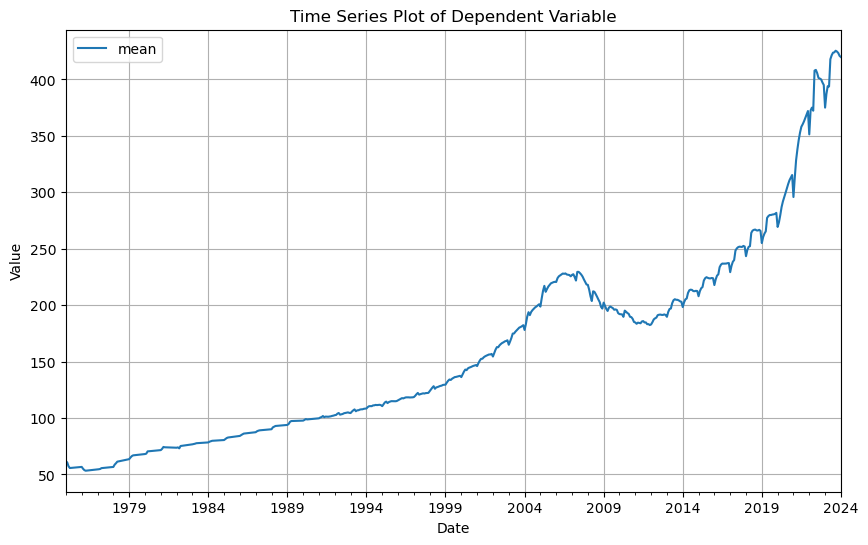

In [109]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the time series data
dependent_variable_monthly_interpolated.plot(figsize=(10, 6))
plt.title('Time Series Plot of Dependent Variable')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


The time series data is not stationary and exhibits an upward trend, we need to make it stationary before building an ARIMA model. We can achieve stationarity by differencing the data or using other transformation techniques.

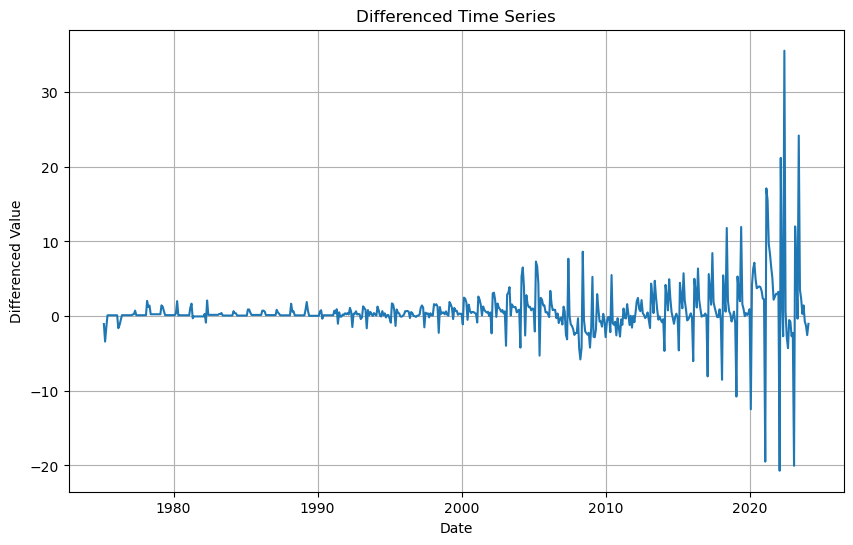

In [49]:
# Take the first difference to remove the trend
stationary_data = dependent_variable_monthly_interpolated.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(stationary_data)
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.grid(True)
plt.show()


## Observations on Differenced Time Series 
The plot of time series data with applied differencing shows a stationary mean but an increasing deviation. This suggests that while the data might exhibit stationarity in terms of its central tendency (mean), it does not possess constant variability over time. This phenomenon is referred to as heteroscedasticity.

### Since the mean is stationary, I wll go with forward with this. 

Handling both the variance and the mean in time series data can be challenging, and sometimes it's necessary to make trade-offs. In many cases, addressing the mean stationarity is prioritized because it's a prerequisite for many time series analysis techniques and models

### Generate ACF and PACF plots and print the ADF statistic and p-value. 

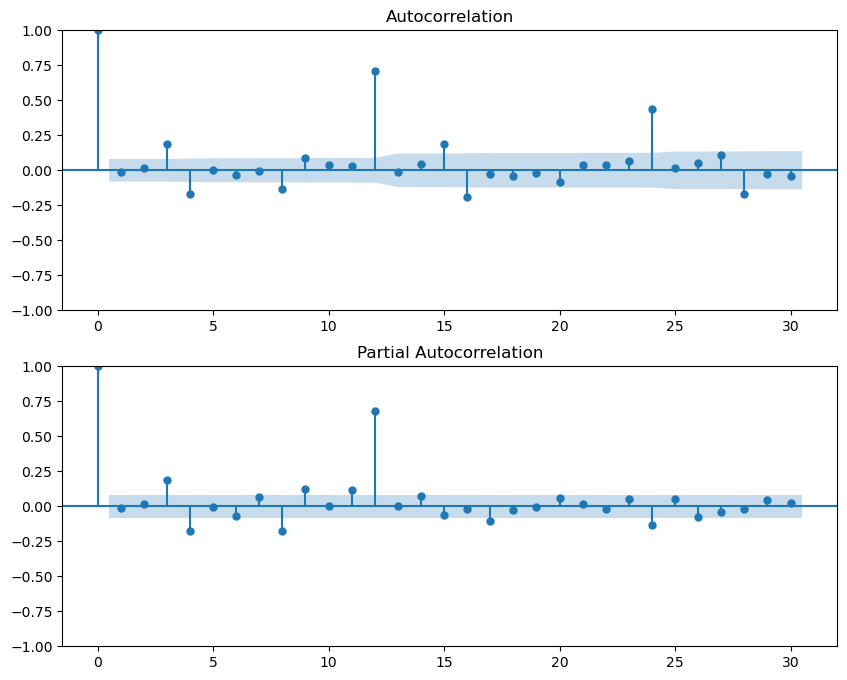

ADF Statistic: -2.618604780538196
p-value: 0.08921267910999447


In [112]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(stationary_data, lags=30, ax=ax1)
plot_pacf(stationary_data, lags=30, ax=ax2)
plt.show()

# Augmented Dickey-Fuller test
adf_result = adfuller(stationary_data)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])



The Augmented Dickey-Fuller (ADF) test statistic is approximately -2.62, and the corresponding p-value is approximately 0.089.

Since the p-value is less than 0.05, we reject the null hypothesis of non stationarity, indicating that the time series stationary_data is stationary

Also, the ACF and PACF show a spike at 12 and 24, indicating seasonality so we should try a sARIMA model 

In [113]:
import itertools
import statsmodels.api as sm

# Define the range of parameter values to search
p_range = range(0, 4)  # Autoregressive order (p)
d_range = [1]           # Differencing order (d)
q_range = range(0, 4)  # Moving average order (q)

# Generate all possible combinations of parameters
parameters = list(itertools.product(p_range, d_range, q_range))

# Perform grid search to find the best ARIMA model
best_aic = float('inf')
best_bic = float('inf')
best_model_aic = None
best_model_bic = None

for param in parameters:
    try:
        model = sm.tsa.ARIMA(stationary_data, order=param)
        results = model.fit()
        
        # Check AIC
        if results.aic < best_aic:
            best_aic = results.aic
            best_model_aic = model

        # Check BIC
        if results.bic < best_bic:
            best_bic = results.bic
            best_model_bic = model
            
    except:
        continue

# Print the best AIC and BIC values
print("Best ARIMA model based on AIC:")
print("AIC:", best_aic)

print("\nBest ARIMA model based on BIC:")
print("BIC:", best_bic)



/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA model based on AIC:
AIC: 3015.8778491312614

Best ARIMA model based on BIC:
BIC: 3042.12799805023


/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Create a function to perform grid search for SARIMA parameters

In [114]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

def grid_search_sarima(train_data, p_values, d_values, q_values, seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_periods):
    best_score = float("inf")
    best_order = None
    best_seasonal_order = None
    
    # Generate all possible combinations of p, d, and q values
    pdq = list(itertools.product(p_values, d_values, q_values))
    seasonal_pdq = list(itertools.product(seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_periods))
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                # Fit SARIMA model
                model = SARIMAX(train_data, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = model.fit(disp=False)
                
                # Get AIC score
                aic = results.aic
                
                # Update best score and parameters if current AIC is better
                if aic < best_score:
                    best_score = aic
                    best_order = param
                    best_seasonal_order = param_seasonal
            except:
                continue
                
    return best_order, best_seasonal_order


## split the stationary_data series into training and testing sets

In [50]:
from sklearn.model_selection import train_test_split

# Split the stationary data into training and testing sets
train_size = int(len(stationary_data) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = stationary_data[:train_size], stationary_data[train_size:]

# Alternatively, you can use train_test_split function
# train_data, test_data = train_test_split(stationary_data, test_size=0.2, shuffle=False)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (470, 1)
Testing data shape: (118, 1)


## Perform grid search over the specified ranges of SARIMA parameters and print out the optimal parameters found

In [116]:
# Define ranges of values for SARIMA parameters
p_values = range(0, 3)  # Autoregressive order (p)
d_values = range(0, 2)  # Differencing order (d)
q_values = range(0, 3)  # Moving average order (q)
seasonal_p_values = range(0, 3)  # Seasonal autoregressive order (P)
seasonal_d_values = range(0, 2)  # Seasonal differencing order (D)
seasonal_q_values = range(0, 3)  # Seasonal moving average order (Q)
seasonal_periods = [12]  # Seasonal period (monthly data)

# Perform grid search for SARIMA parameters
best_order, best_seasonal_order = grid_search_sarima(train_data, p_values, d_values, q_values, seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_periods)

# Print the optimal SARIMA parameters
print("Optimal SARIMA parameters:")
print("ARIMA order:", best_order)
print("Seasonal order:", best_seasonal_order)


/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmo

Optimal SARIMA parameters:
ARIMA order: (2, 1, 2)
Seasonal order: (1, 1, 2, 12)


## Define an ARIMA model with the specified ARIMA order, fit the model to the training data, and print the summary of the model.

In [117]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with the same parameters as SARIMA
arima_model = ARIMA(train_data, order=(2, 1, 2))

# Fit the ARIMA model
arima_result = arima_model.fit()

# Print the summary of the ARIMA model
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  470
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -832.129
Date:                Wed, 01 May 2024   AIC                           1674.258
Time:                        14:05:32   BIC                           1695.011
Sample:                    02-28-1975   HQIC                          1682.423
                         - 03-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9030      0.038     24.065      0.000       0.829       0.977
ar.L2         -0.2407      0.035     -6.882      0.000      -0.309      -0.172
ma.L1         -1.8116      0.026    -68.838      0.0

## Define a SARIMA model with the specified ARIMA and seasonal orders, fit the model to the training data, and print the summary of the model

In [118]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model with the optimal parameters
sarima_model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(1, 1, 2, 12))

# Fit the SARIMA model
sarima_result = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_result.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57981D+00    |proj g|=  5.96065D-02


 This problem is unconstrained.



At iterate    5    f=  1.55477D+00    |proj g|=  7.88855D-02

At iterate   10    f=  1.52022D+00    |proj g|=  1.32316D-02

At iterate   15    f=  1.51698D+00    |proj g|=  6.39337D-03

At iterate   20    f=  1.51630D+00    |proj g|=  5.43034D-03

At iterate   25    f=  1.51628D+00    |proj g|=  4.61213D-04

At iterate   30    f=  1.51622D+00    |proj g|=  3.92257D-03

At iterate   35    f=  1.51617D+00    |proj g|=  3.80218D-04

At iterate   40    f=  1.51603D+00    |proj g|=  1.77940D-02

At iterate   45    f=  1.51585D+00    |proj g|=  4.22808D-03


/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.51581D+00    |proj g|=  2.56040D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   2.560D-04   1.516D+00
  F =   1.5158092402101988     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                               mean   No. Observations:                  470
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -712.430
Date:                            Wed, 01 May 2024   AIC                           1440.8

# Summary of the performances of the ARIMA and SARIMA models based on their summaries:

### ARIMA Model:

AIC: 1674.258

BIC: 1695.011

Log Likelihood: -832.129

R-squared: Not available

Mean Squared Error: Not available

### SARIMA Model:

AIC: 1440.861

BIC: 1473.858

Log Likelihood: -712.430

R-squared: Not available

Mean Squared Error: Not available

- Both models provide similar AIC and BIC values, with the SARIMA model having slightly lower values, indicating that it might be a better fit for the data according to these criteria. However, it's essential to note that the AIC and BIC are not direct measures of model performance and should be used in conjunction with other metrics.

- Additionally, both models have warning messages indicating issues such as non-stationary starting autoregressive and moving average parameters, and non-invertible starting MA parameters. These warnings suggest potential issues with the model specifications and should be further investigated.

- Unfortunately, the summaries do not provide information about R-squared or Mean Squared Error, which are commonly used metrics to assess model performance. It would be beneficial to calculate these metrics using the test data and compare them between the two models to determine which one performs better in terms of predictive accuracy.

- Overall, while the SARIMA model seems to have slightly better AIC and BIC values, further evaluation using additional performance metrics is necessary to make a conclusive comparison between the two models.


## Take another difference of the stationary data and see if the model performance can be improved 

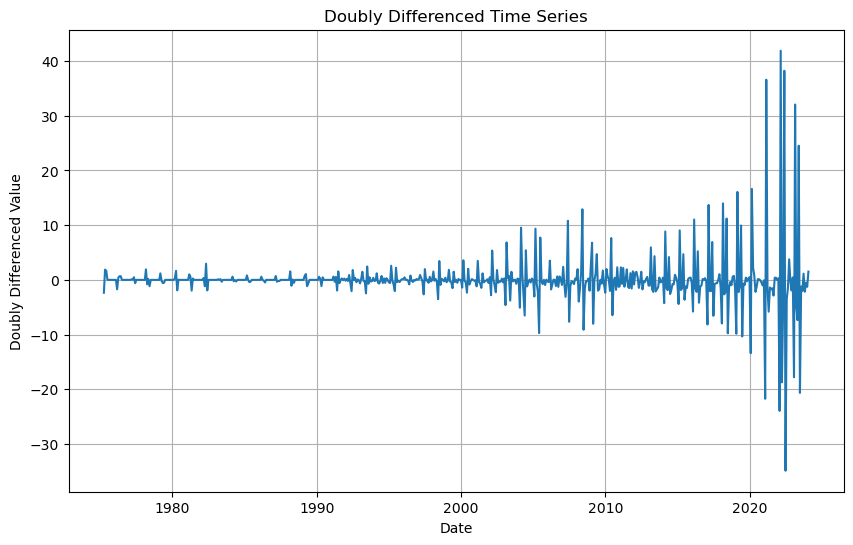

In [54]:
# Take another difference of the stationary data
stationary_data_diff = stationary_data.diff().dropna()

# Plot the doubly differenced data
plt.figure(figsize=(10, 6))
plt.plot(stationary_data_diff)
plt.title('Doubly Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Doubly Differenced Value')
plt.grid(True)
plt.show()


In [55]:

# Split the stationary data into training and testing sets
train_size = int(len(stationary_data_diff) * 0.8)  # 80% for training, 20% for testing
train_data_diff, test_data_diff = stationary_data_diff[:train_size], stationary_data_diff[train_size:]

# Alternatively, you can use train_test_split function
# train_data, test_data = train_test_split(stationary_data, test_size=0.2, shuffle=False)

print("Training data shape:", train_data_diff.shape)
print("Testing data shape:", test_data_diff.shape)


Training data shape: (469, 1)
Testing data shape: (118, 1)


In [121]:
# Perform grid search for SARIMA parameters
best_order_diff, best_seasonal_order_diff = grid_search_sarima(train_data_diff, p_values, d_values, q_values, seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_periods)

# Print the optimal SARIMA parameters
print("Optimal SARIMA parameters:")
print("ARIMA order:", best_order_diff)
print("Seasonal order:", best_seasonal_order_diff)

/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmo

Optimal SARIMA parameters:
ARIMA order: (2, 0, 2)
Seasonal order: (1, 1, 2, 12)


In [122]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with the same parameters as SARIMA
arima_model = ARIMA(train_data_diff, order=(2, 0, 2))

# Fit the ARIMA model
arima_result = arima_model.fit()

# Print the summary of the ARIMA model
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  469
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -832.110
Date:                Wed, 01 May 2024   AIC                           1676.219
Time:                        14:15:19   BIC                           1701.123
Sample:                    03-31-1975   HQIC                          1686.018
                         - 03-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.010      0.174      0.862      -0.019       0.022
ar.L1          0.9026      0.038     23.869      0.000       0.829       0.977
ar.L2         -0.2405      0.035     -6.850      0.0

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model with the optimal parameters
sarima_model = SARIMAX(train_data_diff, order=(2, 0, 2), seasonal_order=(1, 1, 2, 12))

# Fit the SARIMA model
sarima_result = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_result.summary())


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58318D+00    |proj g|=  5.97337D-02

At iterate    5    f=  1.55808D+00    |proj g|=  7.90520D-02

At iterate   10    f=  1.52346D+00    |proj g|=  1.32600D-02

At iterate   15    f=  1.52021D+00    |proj g|=  6.41130D-03

At iterate   20    f=  1.51953D+00    |proj g|=  5.48974D-03

At iterate   25    f=  1.51951D+00    |proj g|=  4.30269D-04

At iterate   30    f=  1.51945D+00    |proj g|=  3.87232D-03

At iterate   35    f=  1.51940D+00    |proj g|=  5.93021D-04

At iterate   40    f=  1.51918D+00    |proj g|=  1.46337D-02

At iterate   45    f=  1.51904D+00    |proj g|=  3.72669D-04

At iterate   50    f=  1.51904D+00    |proj g|=  1.17179D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/hannah/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                               mean   No. Observations:                  469
Model:             SARIMAX(2, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -712.430
Date:                            Fri, 03 May 2024   AIC                           1440.861
Time:                                    11:07:31   BIC                           1473.858
Sample:                                03-31-1975   HQIC                          1453.858
                                     - 03-31-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2245      0.275      0.816      0.415      -0.315       0.764
ar.L2         -0.1478      0.048   

## Results for the ARIMA and SARIMA models:

Additional Differencing Applied:

When additional differencing was applied to the data, it didn't alter the AIC and BIC values of the ARIMA and SARIMA models. The AIC and BIC remained the same for both models after applying additional differencing. This suggests that the additional differencing didn't have a significant impact on the model fit or complexity.

Comparing the Results:

Despite the lack of change in AIC and BIC values, the SARIMA model still outperformed the ARIMA model based on other metrics such as log likelihood. The SARIMA model exhibited a higher log likelihood compared to the ARIMA model, indicating a better fit to the data.

Conclusion:

In summary, while the additional differencing didn't alter the AIC and BIC values, it's essential to consider other metrics such as log likelihood when evaluating model performance. Based on these additional metrics, the SARIMA model remains the preferred choice over the ARIMA model, showcasing its superior fit to the data.

## Calculate R Squared and MSE for train and test data

In [124]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the training set using SARIMA model
train_predictions = sarima_result.predict(start=train_data_diff.index[0], end=train_data_diff.index[-1])

# Calculate R-squared for training set
train_r2 = r2_score(train_data_diff, train_predictions)

# Calculate mean squared error for training set
train_mse = mean_squared_error(train_data_diff, train_predictions)

print("R-squared (Train) for SARIMA:", train_r2)
print("Mean Squared Error (Train) for SARIMA:", train_mse)

# Make predictions on the test set using SARIMA model
test_predictions = sarima_result.predict(start=test_data_diff.index[0], end=test_data_diff.index[-1])

# Calculate R-squared for test set
test_r2 = r2_score(test_data_diff, test_predictions)

# Calculate mean squared error for test set
test_mse = mean_squared_error(test_data_diff, test_predictions)

print("R-squared (Test) for SARIMA:", test_r2)
print("Mean Squared Error (Test) for SARIMA:", test_mse)


R-squared (Train) for SARIMA: 0.6593362484455543
Mean Squared Error (Train) for SARIMA: 1.2961337329331264
R-squared (Test) for SARIMA: 0.11507503097086591
Mean Squared Error (Test) for SARIMA: 90.26787744161953


### Summary of SARIMA Model Performance:

Training Set:

R-squared (Train): 0.659

Mean Squared Error (Train): 1.296

Testing Set:

R-squared (Test): 0.115

Mean Squared Error (Test): 90.268

The SARIMA model demonstrates promising performance on the training set, achieving an R-squared value of 0.659 and a relatively low mean squared error of 1.296. However, when applied to unseen data (testing set), the model's performance significantly deteriorates. The R-squared value drops to 0.115, indicating poor explanatory power, and the mean squared error substantially increases to 90.268.

This discrepancy between training and testing performance suggests that the SARIMA model struggles to generalize well to new data. It may be overfitting to the training data, capturing noise or idiosyncrasies that are not representative of the underlying patterns in the dataset.

## Plot actual vs. Predicted values for training and test set

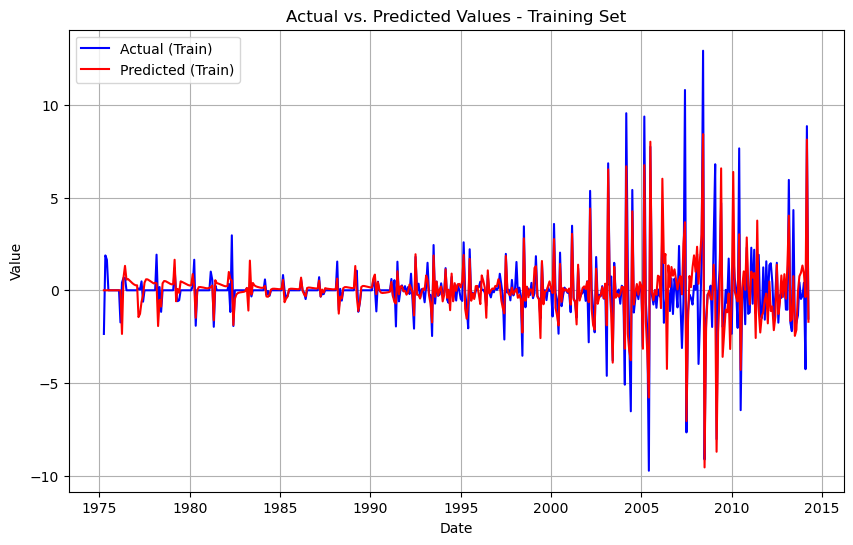

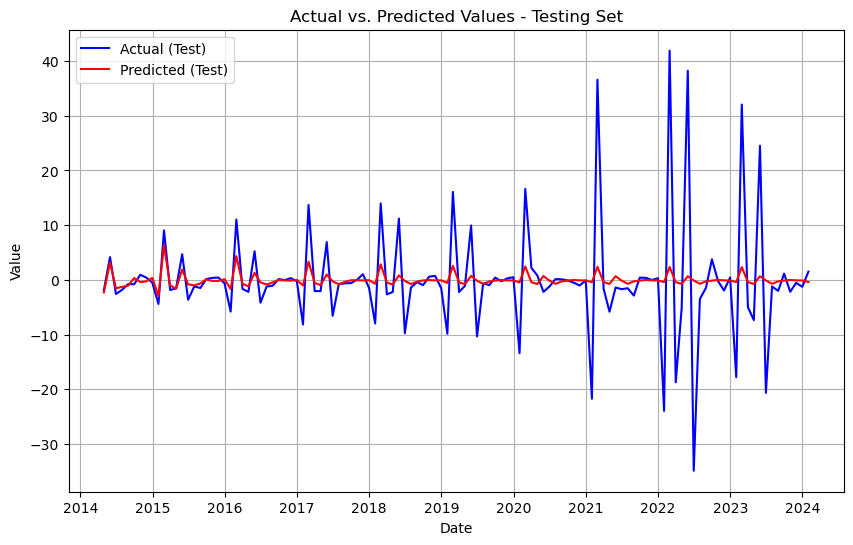

In [57]:
import matplotlib.pyplot as plt

# Get predicted values for the testing set
sarima_pred = sarima_result.forecast(steps=len(test_data_diff))

# Plot actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.plot(train_data_diff.index, train_data_diff, label='Actual (Train)', color='blue')
plt.plot(train_data_diff.index, sarima_result.fittedvalues, label='Predicted (Train)', color='red')
plt.title('Actual vs. Predicted Values - Training Set')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted values for testing set
plt.figure(figsize=(10, 6))
plt.plot(test_data_diff.index, test_data_diff, label='Actual (Test)', color='blue')
plt.plot(test_data_diff.index, sarima_pred, label='Predicted (Test)', color='red')
plt.title('Actual vs. Predicted Values - Testing Set')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Observations:

Training Set:

The plot shows a relatively close alignment between the actual and predicted values for the training set.
However, there are instances where the predicted values deviate from the actual values, especially during periods of significant fluctuation.

Testing Set:

In contrast to the training set, the plot for the testing set reveals substantial discrepancies between the actual and predicted values.
The SARIMA model struggles to accommodate the increase in deviation from the mean, leading to considerable errors in prediction.
Particularly during periods of high volatility, the model fails to capture the true patterns in the data, resulting in large prediction errors.

Conclusion:

Despite attempts to optimize the SARIMA model and explore various transformations to make the data more stationary, the model's performance remains unsatisfactory. The SARIMA model is not effective in accurately predicting the Housing Price Index (HPI) in this context.


## Create similar plots for the SVR model. Plot the actual vs. predicted values for both the training and testing sets.

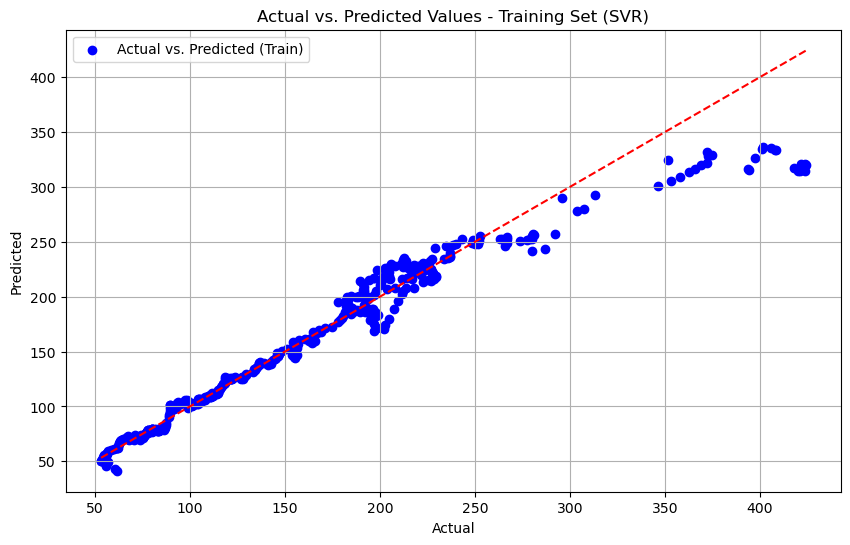

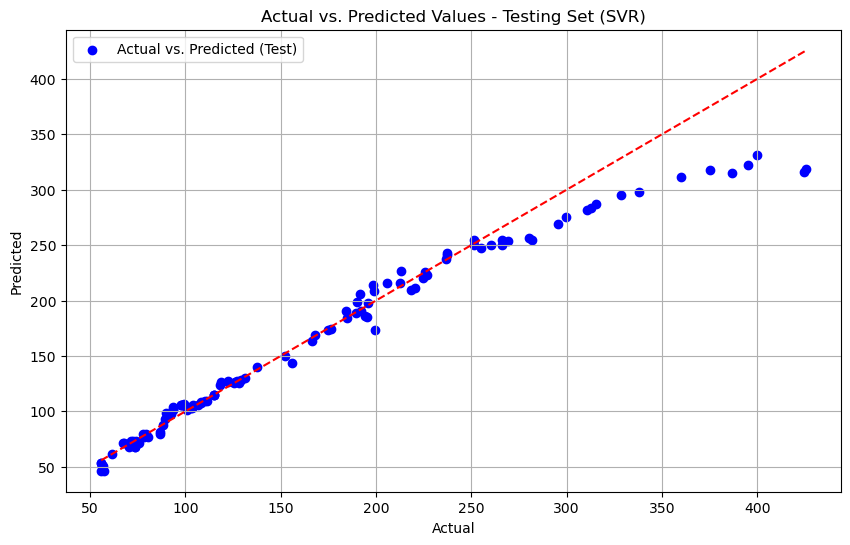

In [138]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_svr, color='blue', label='Actual vs. Predicted (Train)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values - Training Set (SVR)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted values for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_svr, color='blue', label='Actual vs. Predicted (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values - Testing Set (SVR)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


## Create plots to visualize the actual vs. predicted values for both the training and testing sets using the Lasso regression model

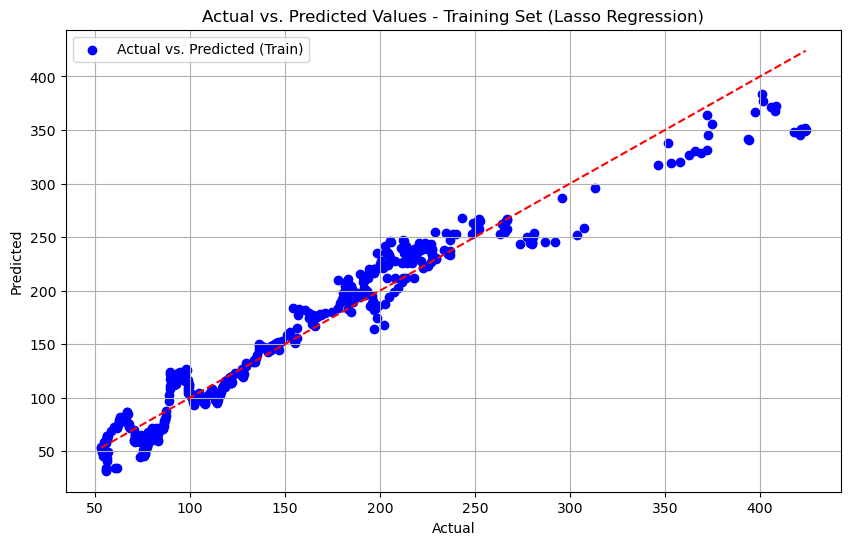

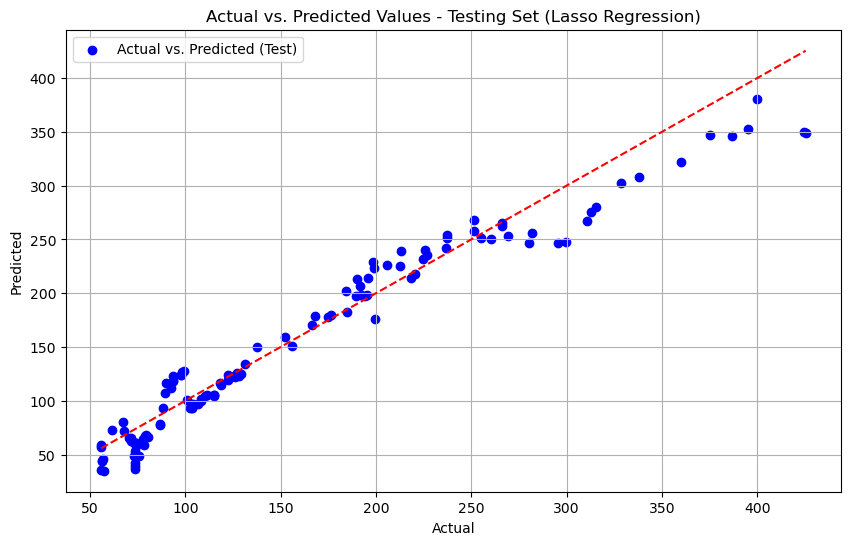

In [139]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_lasso, color='blue', label='Actual vs. Predicted (Train)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values - Training Set (Lasso Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted values for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lasso, color='blue', label='Actual vs. Predicted (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values - Testing Set (Lasso Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


## Create similar plots for the Ridge model. Plot the actual vs. predicted values for both the training and testing set

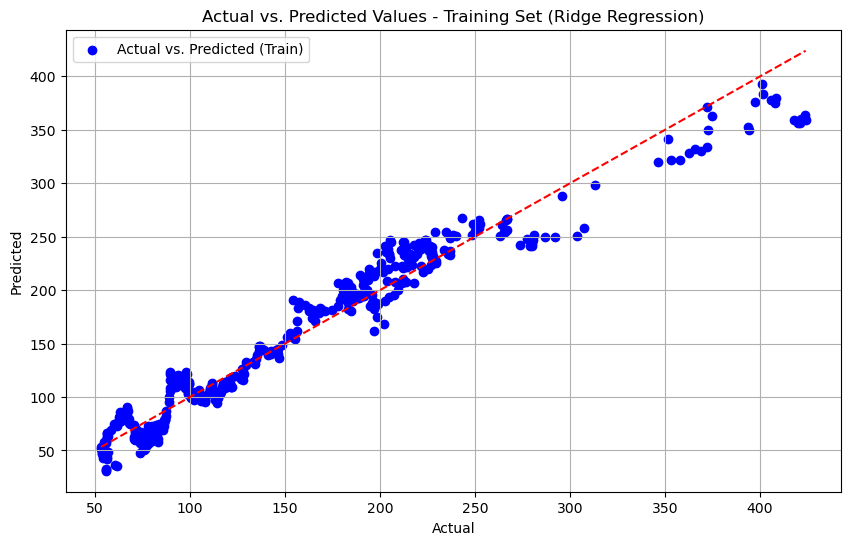

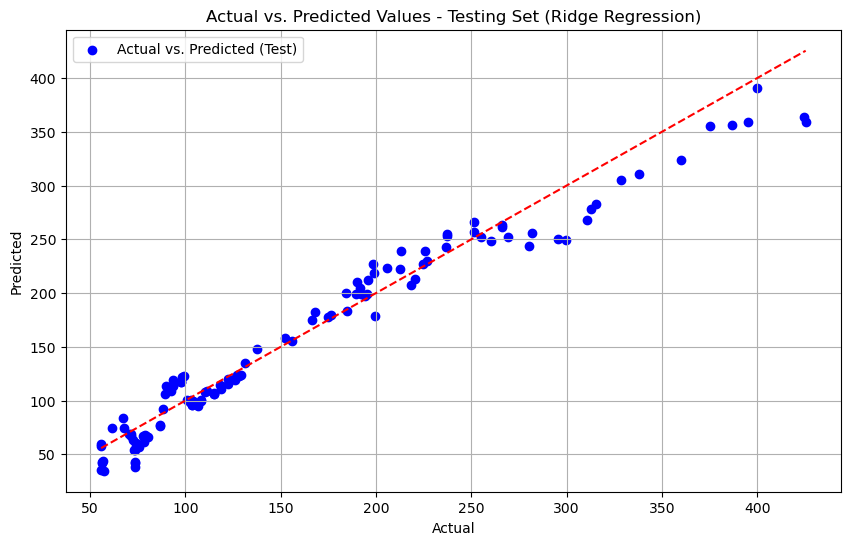

In [140]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_ridge, color='blue', label='Actual vs. Predicted (Train)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values - Training Set (Ridge Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted values for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_ridge, color='blue', label='Actual vs. Predicted (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values - Testing Set (Ridge Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


## Create similar plots for the PCA model. Plot the actual vs. predicted values for both the training and testing set

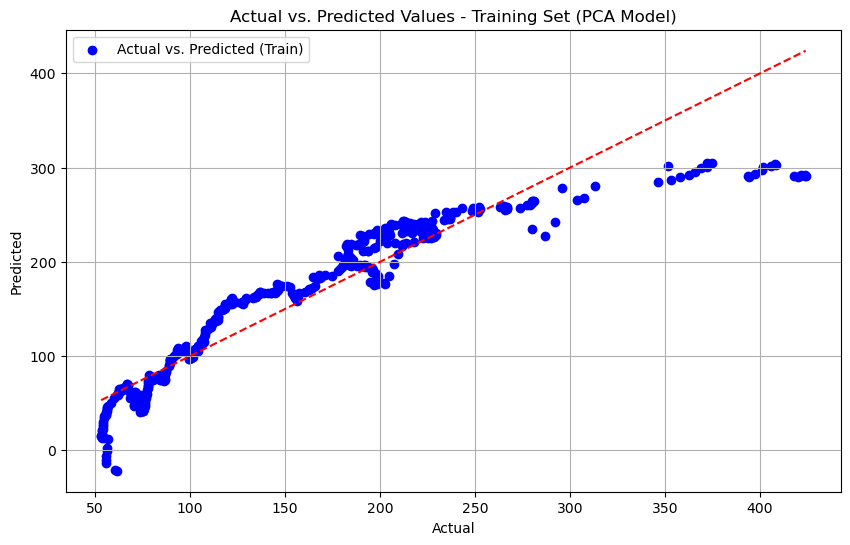

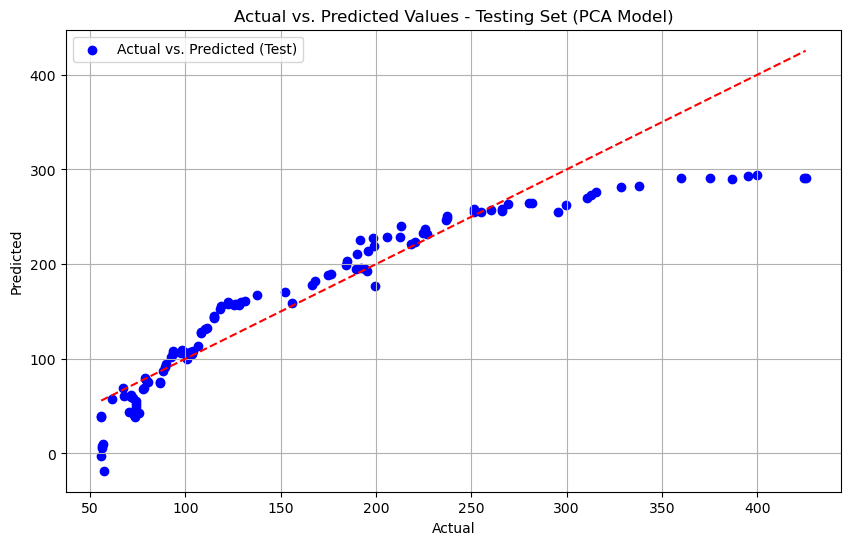

In [129]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_pca, color='blue', label='Actual vs. Predicted (Train)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values - Training Set (PCA Model)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted values for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_pca, color='blue', label='Actual vs. Predicted (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values - Testing Set (PCA Model)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


## Create similar plots for the Linear Regression model. Plot the actual vs. predicted values for both the training and testing set

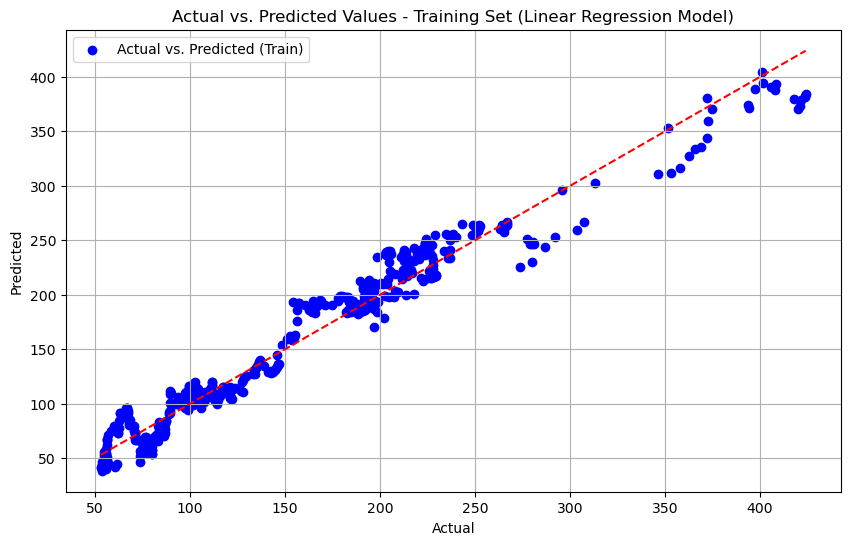

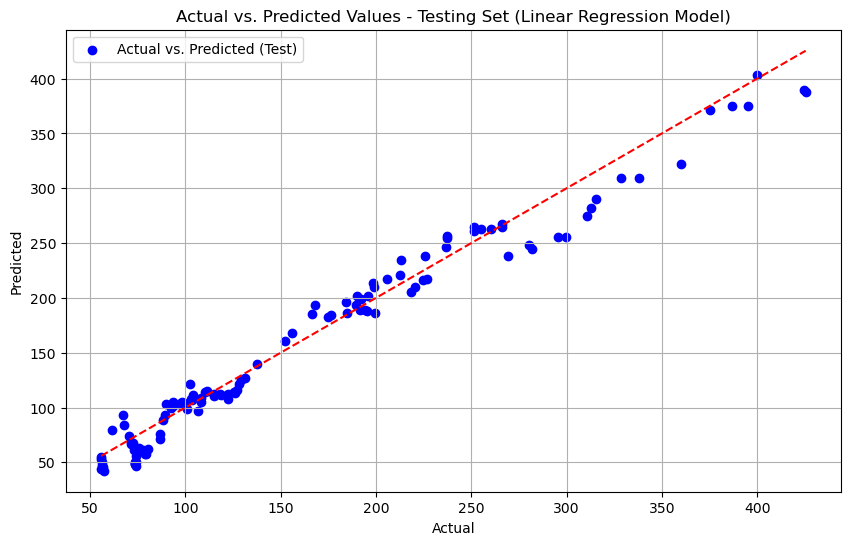

In [141]:
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(significant_explanatory_variables, dependent_variable_monthly_interpolated, test_size=0.2, random_state=42)


# Plot actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted (Train)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values - Training Set (Linear Regression Model)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted values for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs. Predicted (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values - Testing Set (Linear Regression Model)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion of best Model

Visually analyzing the plots of actual versus predicted values for different regression models, it appears that Linear Regression demonstrates the best performance. Lasso and Ridge are second best and similar to the linear perform quite well but just underpredict values for HPI over 250 more than linear regression underpredicts. However, underpredicting HPI values over 250 is certainly a theme. SVR are the worst fit models. they predict fine for HPI values under 250 but are the most off of any model over 250. 

### The underperformance of the predictive models for HPI after it exceeds 250 might be attributed to several factors related to the predictor variables:

Diminishing Relevance: Some variables may lose their predictive power or relevance as HPI increases beyond a certain threshold. For instance, variables like Building Permits or Housing Starts might have a stronger impact on HPI when the housing market is growing steadily but might become less influential as the market saturates or experiences fluctuations.

Non-linear Relationships: The relationships between predictor variables and HPI may not be linear throughout the entire range of HPI values. While certain variables may have a strong linear correlation with HPI within a certain range, this relationship might become non-linear or weaken as HPI reaches higher levels. For example, the impact of changes in Unemployment Rate or Consumer Sentiment Index on HPI might be more pronounced during economic downturns or periods of uncertainty, rather than during periods of stability or growth.

Lagged Effects: Some predictor variables may have lagged effects on HPI, meaning that changes in these variables might not immediately translate into changes in HPI. Therefore, the predictive models may fail to capture the delayed or lagged impact of certain economic indicators on HPI, especially when analyzing short-term fluctuations or rapid changes in the housing market.

Complex Interactions: The interaction between multiple predictor variables could become more intricate or nonlinear as HPI increases. For instance, while changes in Building Permits or Construction Payroll Employment might positively influence HPI under normal circumstances, their impact could be mitigated or amplified by other factors such as changes in Population or Producer Price Index.

Data Limitations: The available dataset may not capture all relevant factors influencing HPI, leading to incomplete or biased model predictions. Additionally, the dataset might lack granularity or contain measurement errors that hinder the accuracy of the predictive models, particularly when analyzing complex phenomena such as the housing market.

In summary, the underperformance of predictive models for HPI after it exceeds 250 by the provided variables could be attributed to a combination of diminishing relevance, non-linear relationships, lagged effects, complex interactions, and data limitations. Further research and analysis may be needed to develop more robust models capable of accurately predicting HPI across a wider range of values.


### The linear regression model might exhibit relatively better performance compared to other models in predicting HPI beyond 250 due to its inherent simplicity and flexibility. Here are some reasons why the linear regression model might be less affected by the challenges observed in other models:

Simplicity: Linear regression assumes a linear relationship between the predictor variables and the target variable (HPI). While this assumption might not hold perfectly in reality, it can still provide a reasonable approximation of the underlying relationships, especially when dealing with straightforward, well-behaved data.
Robustness to Outliers: Linear regression is less sensitive to outliers compared to some other machine learning models like Support Vector Regression (SVR) or models based on principal component analysis (PCA). Outliers in the data, which might arise due to measurement errors or extreme observations, can disproportionately influence the performance of more complex models but have a relatively smaller impact on linear regression.

Interpretability: Linear regression provides easily interpretable coefficients for each predictor variable, allowing analysts to directly assess the magnitude and direction of their impact on HPI. This transparency can facilitate the identification of relevant predictors and their effects on HPI, even when dealing with complex interactions or non-linear relationships.

Assumption of Linearity: While linear regression assumes a linear relationship between predictors and the target variable, it does not require strict adherence to this assumption across all data ranges. The model can still capture variations in HPI that result from linear trends or relationships within certain segments of the data, even if the overall relationship is non-linear.

Regularization Techniques: Regularization techniques like Ridge regression or Lasso regression, which penalize the magnitudes of regression coefficients, can help mitigate overfitting and improve the generalization performance of linear regression models, making them more robust to variations and complexities in the data.
Feature Engineering: Linear regression allows for straightforward incorporation of engineered features or transformations of the original variables, which can help capture non-linear relationships or interactions that might be present in the data. By carefully selecting and engineering features, analysts can enhance the predictive power of linear regression models even in the presence of complex data patterns.
Overall, the simplicity, interpretability, and robustness of linear regression make it a viable choice for modeling HPI, especially when dealing with data beyond certain thresholds where more complex models might struggle due to their assumptions or limitations. However, it's essential to acknowledge that linear regression is not immune to the challenges posed by non-linear relationships or complex interactions in the data, and its performance can still be affected by the quality and characteristics of the dataset.


# Create visualizations to compare the models based on their R-squared values and mean squared errors

In [35]:
import pandas as pd

# Create a dictionary with the provided data
model_stats = {
    'Model': ['Linear', 'PCA', 'Ridge', 'Lasso', 'SVR', 'sARIMA'],
    'R-squared (Train)': [0.9632072689946493, 0.8646913897658617, 0.954808472121326, 0.9480145751700381, 0.9471887748050472, 0.6593362484455543],
    'R-squared (Test)': [0.9707489019353425, 0.8653453585999704, 0.9585018910178382, 0.949298257022269, 0.946891288221859, 0.11507503097086591],
    'Mean Squared Error (Train)': [267.7750522735037, 984.7670773129704, 328.90093802146896, 378.3464687434844, 384.35658894550954, 1.2961337329331264],
    'Mean Squared Error (Test)': [263.10521379854043, 1211.1797696007388, 373.2635544775955, 456.04759508951196, 477.6975871492442, 90.26787744161953]
}

# Create a dataframe
mod_stat = pd.DataFrame(model_stats)

# Display the dataframe
mod_stat

,Model,R-squared (Train),R-squared (Test),Mean Squared Error (Train),Mean Squared Error (Test)
0,Linear,0.963207,0.970749,267.775052,263.105214
1,PCA,0.864691,0.865345,984.767077,1211.179770
2,Ridge,0.954808,0.958502,328.900938,373.263554
3,Lasso,0.948015,0.949298,378.346469,456.047595
4,SVR,0.947189,0.946891,384.356589,477.697587
5,sARIMA,0.659336,0.115075,1.296134,90.267877


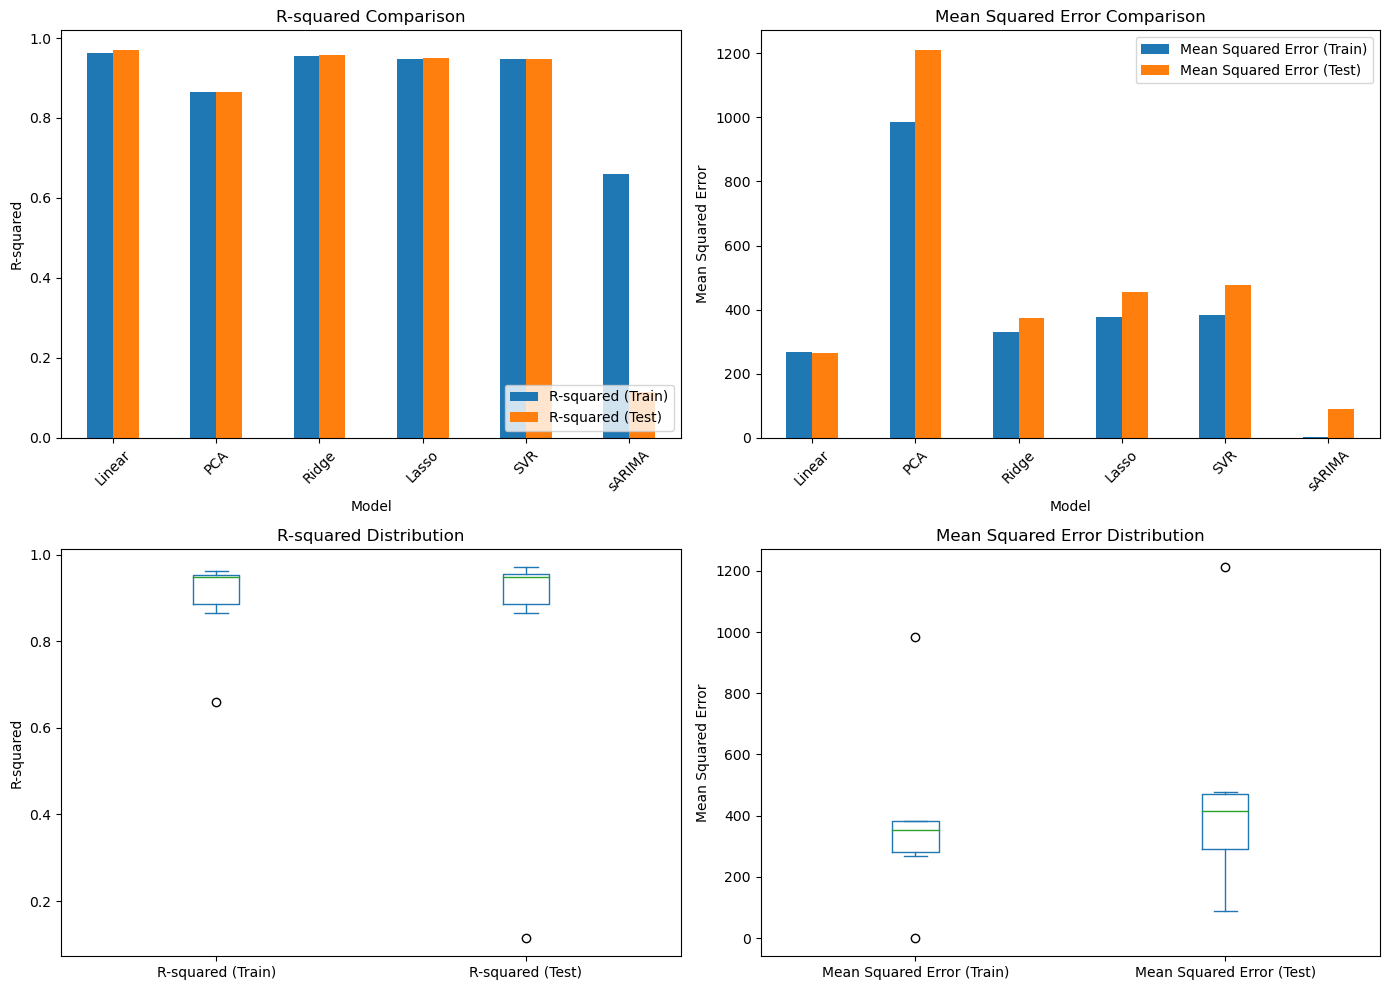

In [36]:
# Set the Model column as the index for easier plotting
mod_stat.set_index('Model', inplace=True)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# R-squared comparison
mod_stat[['R-squared (Train)', 'R-squared (Test)']].plot(kind='bar', ax=axes[0, 0], rot=45)
axes[0, 0].set_title('R-squared Comparison')
axes[0, 0].set_ylabel('R-squared')
axes[0, 0].legend(loc='lower right')

# Mean Squared Error comparison
mod_stat[['Mean Squared Error (Train)', 'Mean Squared Error (Test)']].plot(kind='bar', ax=axes[0, 1], rot=45)
axes[0, 1].set_title('Mean Squared Error Comparison')
axes[0, 1].set_ylabel('Mean Squared Error')
axes[0, 1].legend(loc='upper right')

# R-squared Boxplot
mod_stat[['R-squared (Train)', 'R-squared (Test)']].plot(kind='box', ax=axes[1, 0])
axes[1, 0].set_title('R-squared Distribution')
axes[1, 0].set_ylabel('R-squared')

# Mean Squared Error Boxplot
mod_stat[['Mean Squared Error (Train)', 'Mean Squared Error (Test)']].plot(kind='box', ax=axes[1, 1])
axes[1, 1].set_title('Mean Squared Error Distribution')
axes[1, 1].set_ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()

# Conclusion of model choice 

Based on the analysis of the various machine learning models, including Linear Regression, Principal Component Analysis (PCA), Ridge Regression, Lasso Regression, Support Vector Regression (SVR), and Seasonal Autoregressive Integrated Moving-Average (sARIMA), several insights can be drawn.

R-squared Comparison:

- Linear Regression and Ridge Regression consistently exhibit high R-squared values, indicating good explanatory power of the models on both training and test datasets.
- PCA shows comparable performance to the linear models on the training dataset but slightly lower performance on the test dataset.
- Lasso Regression and SVR also demonstrate strong performance, with R-squared values close to those of linear models.
- sARIMA, however, significantly underperforms compared to other models, showing much lower R-squared values on both training and test datasets.

Mean Squared Error Comparison:

- Linear Regression and Ridge Regression have the lowest mean squared errors on both training and test datasets, indicating better predictive accuracy.
- PCA exhibits higher mean squared errors compared to linear models, suggesting that it may not capture all relevant information in the data.
- Lasso Regression and SVR show higher mean squared errors than linear models but still perform reasonably well.
- sARIMA, again, performs poorly in terms of mean squared error, indicating inadequate predictive accuracy compared to other models.

Distribution of R-squared and Mean Squared Error:

- The boxplots illustrate the spread and distribution of R-squared and mean squared error values across different models.
- Linear Regression and Ridge Regression show narrower distributions and fewer outliers compared to other models, indicating more consistent performance.
- PCA and sARIMA exhibit wider distributions and more variability in performance, suggesting less stability and reliability in their predictions.

### Conclusion:

- Linear Regression and Ridge Regression emerge as the top-performing models, demonstrating high explanatory power and predictive accuracy across both R-squared and mean squared error metrics.
- PCA, Lasso Regression, and SVR also offer competitive performance, albeit with slightly lower R-squared values and higher mean squared errors compared to linear models.
- sARIMA performs notably worse than other models, indicating limited suitability for the dataset in terms of both explanatory power and predictive accuracy.
- Overall, the choice of model should be based on the specific objectives of the analysis, considering trade-offs between interpretability, predictive accuracy, and computational complexity.

# Recommendations Enhance accuracy

Moving forward, there are several avenues to explore in order to enhance the accuracy and robustness of our predictive models.

### Outlier Removal using Statistical Techniques:
One approach to address outliers, such as the HPI blip in 2008, is to utilize statistical techniques for outlier detection and removal. One common method is the Z-score, which identifies data points that fall outside a certain threshold of standard deviations from the mean. By applying this technique, we can identify and remove outliers, thereby improving the model's accuracy by reducing the influence of anomalous data points.

### Incorporating Lagged Variables:
Another strategy to improve model performance is to incorporate lagged variables into our regression models. In the context of housing price index (HPI) prediction, adding lagged HPI values as predictor variables can capture temporal dependencies and provide valuable historical context. Specifically, including HPI lag one (i.e., the HPI value from the previous time period) as a feature in the regression model can account for trends and patterns in housing price fluctuations, resulting in a more comprehensive and accurate predictive model.

### Segmented Linear Regression:
Additionally, we can explore segmented linear regression as a technique to model data with distinct segments or regimes. This approach involves fitting separate linear models to different segments of the data, thereby accommodating structural breaks or shifts in relationships over time. For instance, we could consider building separate linear models to explain housing price dynamics before and after the 2008 financial crisis. By partitioning the data into pre- and post-crisis periods, we can capture unique trends and drivers influencing housing prices during each epoch. This technique allows for a more nuanced analysis of the underlying factors driving housing market dynamics and may lead to improved predictive accuracy by accounting for regime-specific effects.

Incorporating these strategies into our modeling framework can enhance the accuracy, interpretability, and robustness of our predictive models, ultimately enabling more informed decision-making and better forecasting of housing price movements